# Project Description


# New Section

Project Description: You are hired as data scientists by Mashable, an online news
platform that generates buzz through shares of its posts. Your task is to build a model
to predict the number of shares a news article will receive based on its characteristics.
Data: The data comes from Mashable.com, hosted on the UC Irvine Machine Learning
repository: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity.
You can download the dataset from there or at https://richardson.byu.edu/220/
OnlineNewsPopularity.csv. There are 61 variables in total. A description of the
variables is available at https://richardson.byu.edu/220/ONPvariables.txt. The
target variable is the number of shares a news article receives, located as the last
variable in the dataset.
Deliverables: Your work will culminate in two key deliverables:
1. A script or notebook containing all analyses and modeling steps.
2. A technical report for Mashable, written according to the instructions below.

# Project Details

Exploratory Data Analysis (EDA):
1. Plot the target variable. Determine if the target variable seems appropriate or if
any transformations are needed.
2. Build a linear regression model without higher-order terms and identify the most
significant predictors.
3. Build a regression tree to identify important predictors.
1
4. Select several significant features from steps 2 and 3. Create visualizations or
tables to explore the relationships between these features and the target variable.
5. Write an EDA section in your technical report. Report the results of the initial models and include figures or tables that show the target variable and its
relationship with potentially significant predictors.
6. Use appropriate methods to remove insignificant variables from the model.
Linear Regression Modeling: Build and tune a linear regression model with high
predictive power, explaining to Mashable which features most influence the number of
shares.
1. Split the data into training and testing sets. Use the training set for model fitting
and the testing set to check for overfitting and predictive performance.
2. Explore transformations of the target and other variables.
3. Explore higher-order terms.
4. Reduce the model using the following methods:
• Stepwise model evaluation methods to remove insignificant variables.
• LASSO regression to fit the full model and remove insignificant variables.
Tune the model to find the best α.
5. Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the
model?s usefulness for predicting future shares.
Regression Tree Modeling: Build and tune a regression tree model.
1. Use the same training and testing sets as above.
2. Use cost-complexity pruning and cross-validation to find a model that fits well
on out-of-sample data.
3. Fit a random forest regression model, using cost-complexity pruning for the individual trees.
4. Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the model’s usefulness for predicting future shares.
Conclusion: Compare each model’s predictive accuracy on the test set. Choose the
best-performing model as the final predictive model. Write a concluding section in
your technical report that addresses Mashable?s business

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Import dataset
dataset = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv')


# iterate over all column names and removing any spaces
for col in dataset.columns:
    dataset.rename(columns={col: col.strip().replace(' ', '_')}, inplace=True)



<Axes: xlabel='shares', ylabel='Count'>

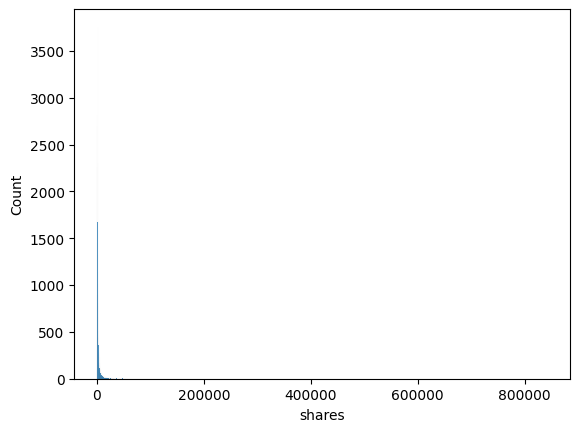

In [3]:
#Plot shares from dataset
dataset.shape
sns.histplot(dataset['shares'])

<Axes: xlabel='log_shares', ylabel='Count'>

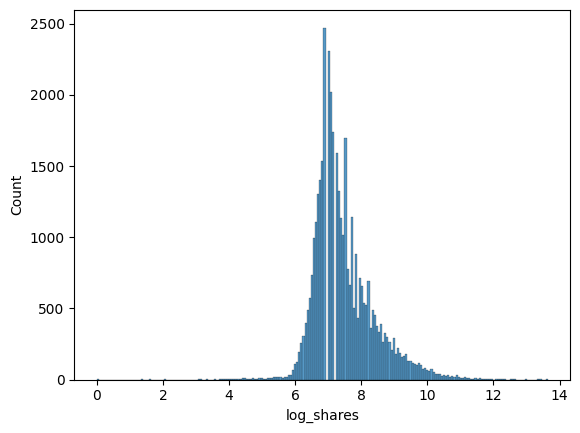

In [4]:
#add log shares column to dataset
dataset['log_shares'] = np.log(dataset['shares'])
sns.histplot(dataset['log_shares'])

In [5]:
#drop
dataset = dataset.drop(columns=['url','timedelta','shares'], axis=1)
dataset = pd.get_dummies(dataset, drop_first=True)

In [6]:
#Generate X as predictor and y as log_share
X = dataset.drop(['log_shares'], axis=1)
X = sm.add_constant(X)
y = dataset['log_shares']



model = sm.OLS(y,X)

In [7]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:06:23   Log-Likelihood:                -50707.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39587   BIC:                         1.020e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [8]:
#iterativly pop variale with p value greater than .05 until all elements are less than .o5
X_copy = X.copy()
while results.pvalues.drop("const").max() > 0.05:
  max_p_value_predictor = results.pvalues.drop("const").idxmax()
  print(f"Dropping {max_p_value_predictor}")
  X_copy = X_copy.drop(max_p_value_predictor, axis=1)

  model = sm.OLS(y, X_copy)
  results = model.fit()
results.summary()

Dropping self_reference_max_shares
Dropping avg_positive_polarity
Dropping weekday_is_saturday
Dropping is_weekend
Dropping LDA_02
Dropping weekday_is_sunday
Dropping min_negative_polarity
Dropping global_rate_negative_words
Dropping n_non_stop_words
Dropping max_positive_polarity
Dropping kw_max_max
Dropping abs_title_sentiment_polarity
Dropping max_negative_polarity
Dropping data_channel_is_world
Dropping num_videos
Dropping self_reference_min_shares
Dropping global_sentiment_polarity


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     139.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:06:26   Log-Likelihood:                -50715.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39602   BIC:                         1.019e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.6163      0.052    127.891      0.000       6.515       6.718
n_tokens_title                    0.0072      0.002      3.342      0.001       0.003       0.011
n_tokens_content               4.998e-05   1.25e-05      3.987      0.000    2.54e-05    7.46e-05
n_unique_tokens                   0.2721      0.109      2.489      0.013       0.058       0.486
n_non_stop_unique_tokens         -0.2903      0.118     -2.464      0.014      -0.521      -0.059
num_hrefs                         0.0042      0.001      8.456      0.000       0.003       0.005
num_self_hrefs                   -0.0079      0.001     -5.983      0.000      -0.010      -0.005
num_imgs                          0.0023      0.001      3.459      0.001       0.001       0.004
average_token_length             -0.0968      0.018     -5.419      0.000      -0.132      -0.062
num_keywords                      0.0121      0.003      4.344      0.000       0.007       0.017
data_channel_is_lifestyle        -0.0829      0.025     -3.269      0.001      -0.133      -0.033
data_channel_is_entertainment    -0.1671      0.017     -9.810      0.000      -0.200      -0.134
data_channel_is_bus              -0.1436      0.024     -5.979      0.000      -0.191      -0.097
data_channel_is_socmed            0.1831      0.023      7.897      0.000       0.138       0.229
data_channel_is_tech              0.1274      0.022      5.919      0.000       0.085       0.170
kw_min_min                        0.0009    8.1e-05     10.709      0.000       0.001       0.001
kw_max_min                     1.666e-05   3.79e-06      4.398      0.000    9.23e-06    2.41e-05
kw_avg_min                       -0.0001   2.33e-05     -5.301      0.000      -0.000   -7.77e-05
kw_min_max                    -3.537e-07   8.78e-08     -4.027      0.000   -5.26e-07   -1.82e-07
kw_avg_max                    -2.851e-07   5.83e-08     -4.886      0.000   -3.99e-07   -1.71e-07
kw_min_avg                    -5.143e-05    5.7e-06     -9.024      0.000   -6.26e-05   -4.03e-05
kw_max_avg                    -4.242e-05   1.89e-06    -22.460      0.000   -4.61e-05   -3.87e-05
kw_avg_avg                        0.0003   1.07e-05     31.547      0.000       0.000       0.000
self_reference_avg_sharess     1.953e-06   1.85e-07     10.568      0.000    1.59e-06    2.32e-06
weekday_is_monday                -0.2205      0.016    -13.573      0.000      -0.252      -0.189
weekday_is_tuesday               -0.2873      0.016    -18.094      0.000      -0.318      -0.256
weekday_is_wednesday             -0.2839      0.016    -17.876      0.000      -0.315      -0.253
weekday_is_thursday              -0.2787      0.016    -17.490      0.000      -0.310      -0.247
weekday_is_friday                -0.2151     

<Axes: >

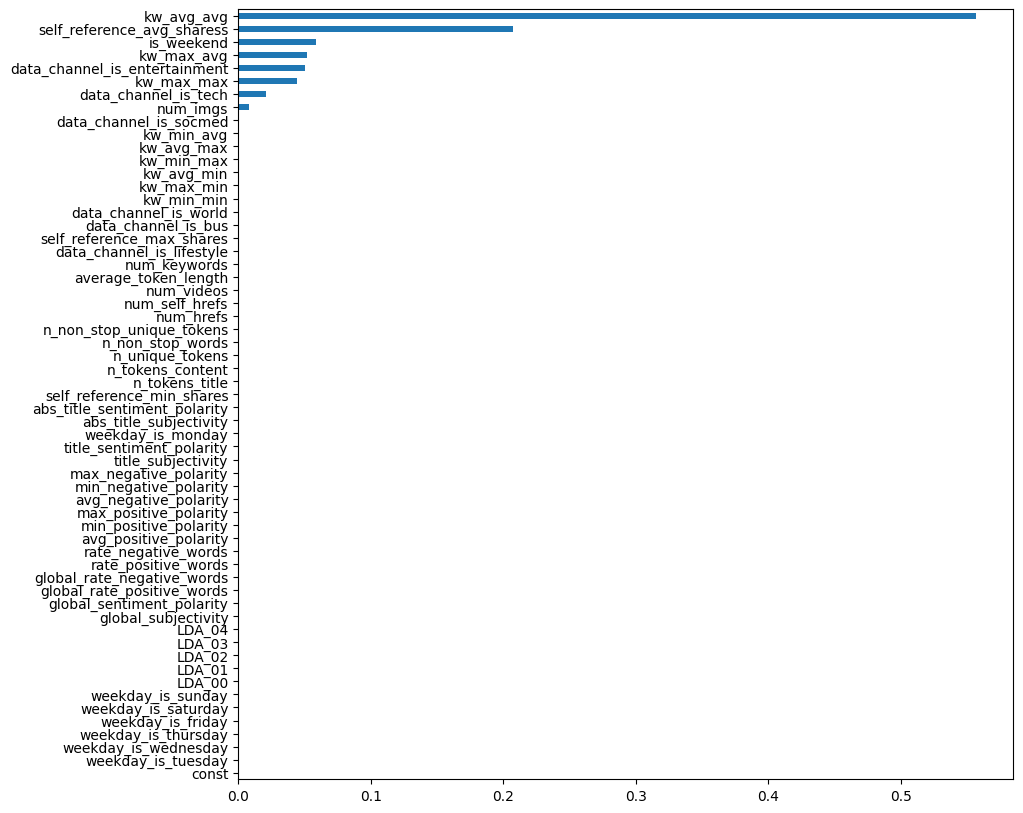

In [9]:
#build a regresion tree for the data
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)

plt.figure(figsize=(10, 10))


pd.Series(tree.feature_importances_, index=X.columns).sort_values().plot(kind='barh')

In [10]:
p_thresh = 1e-25
sig_feats = set(results.pvalues[results.pvalues < p_thresh].index)

sig_feats.update([col_name for col_name, val in zip(X.columns, tree.feature_importances_) if val > 0])
sig_feats

{'LDA_00',
 'const',
 'data_channel_is_entertainment',
 'data_channel_is_tech',
 'is_weekend',
 'kw_avg_avg',
 'kw_max_avg',
 'kw_max_max',
 'kw_min_min',
 'num_imgs',
 'self_reference_avg_sharess',
 'weekday_is_friday',
 'weekday_is_monday',
 'weekday_is_thursday',
 'weekday_is_tuesday',
 'weekday_is_wednesday'}

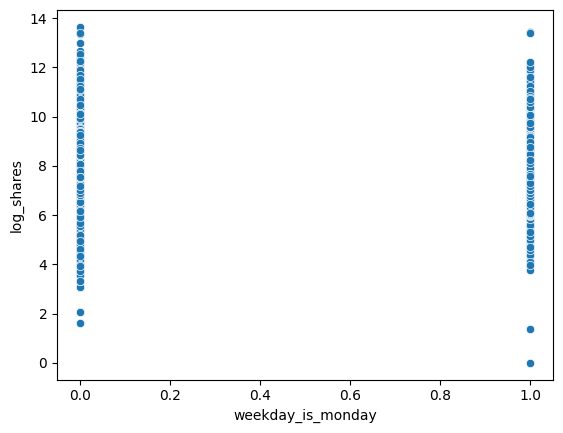

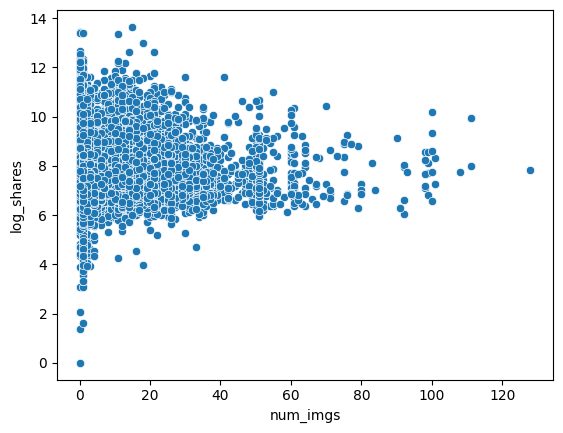

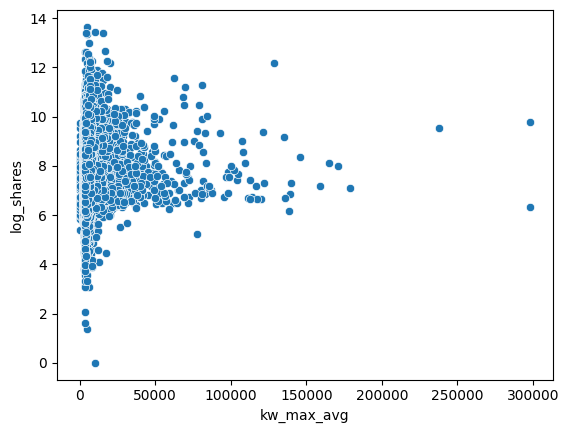

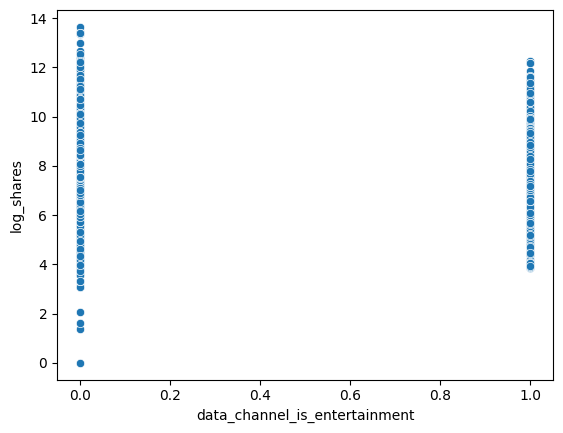

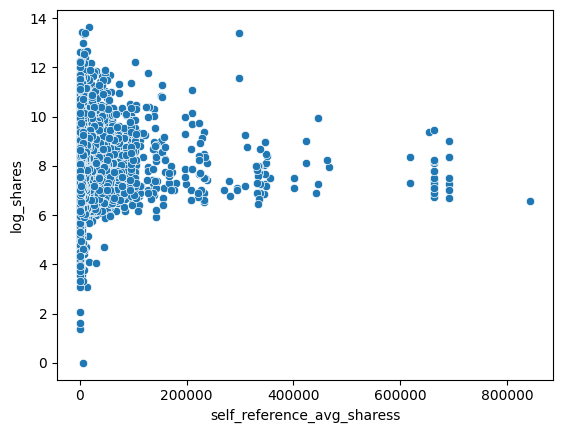

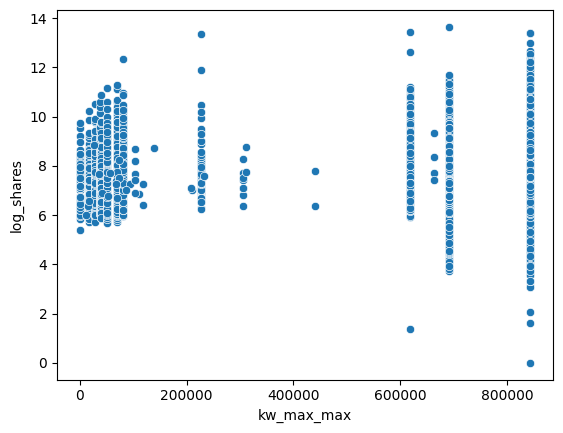

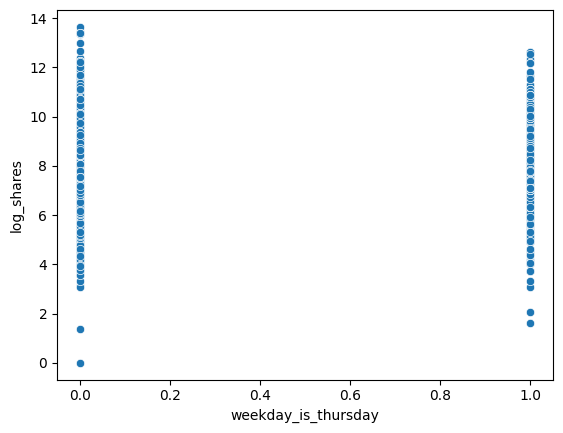

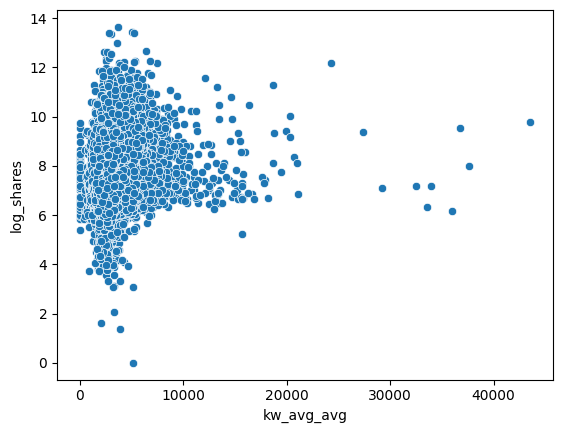

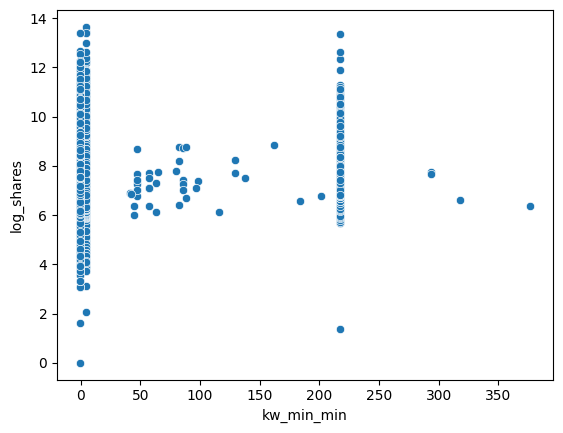

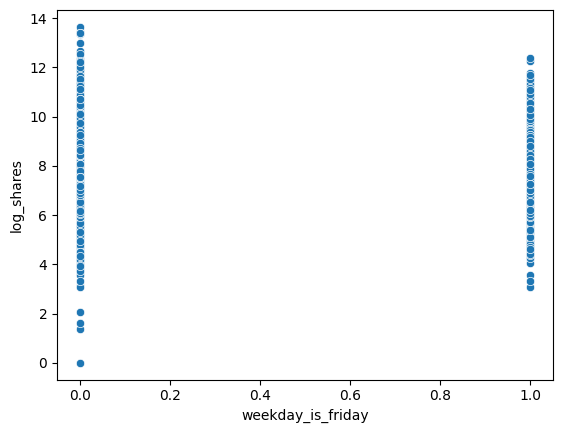

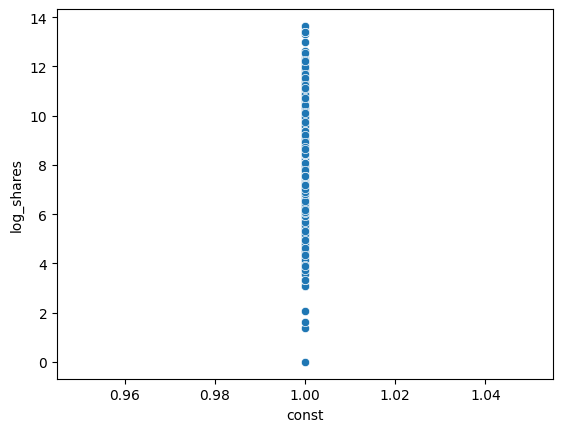

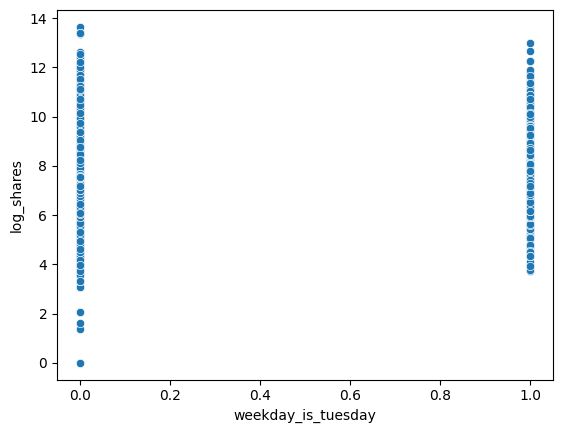

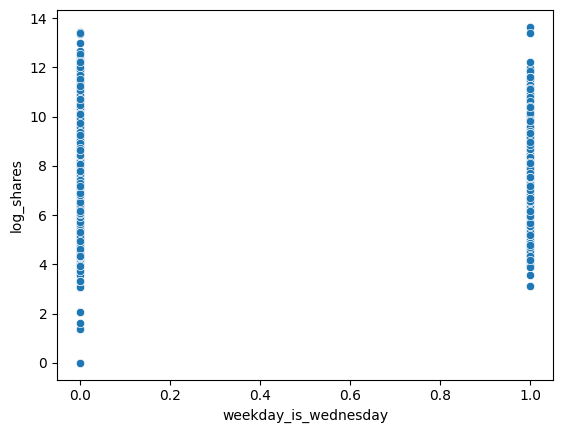

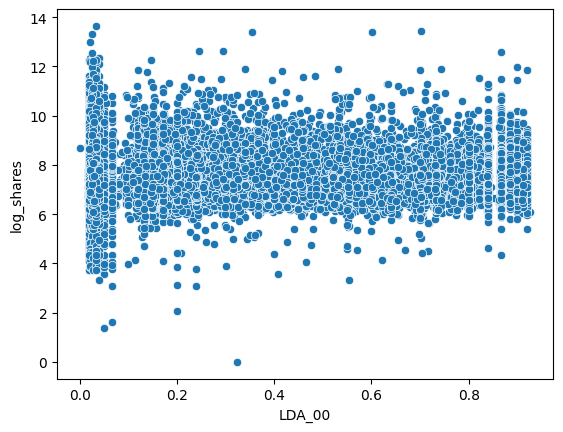

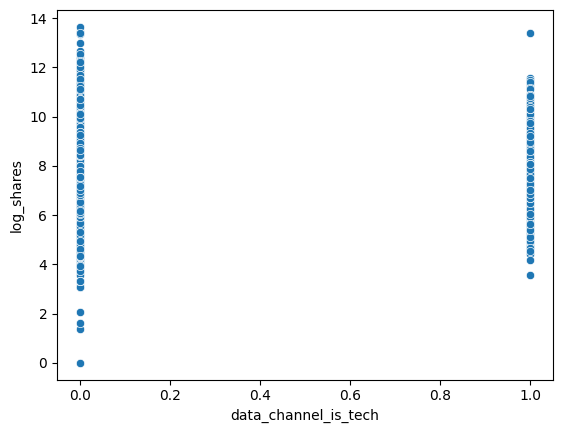

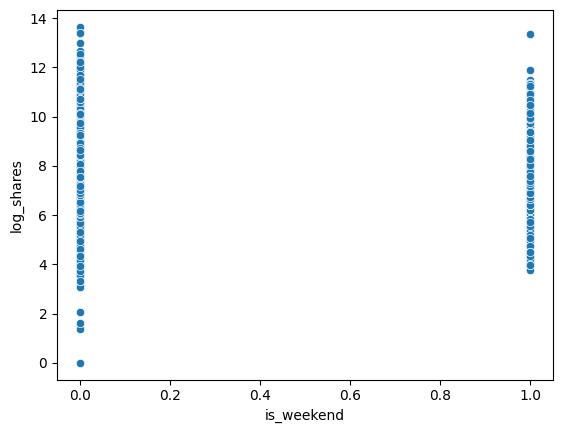

In [11]:
#graph each sig_feat agains log_shares
for sig_feat in sig_feats:
  sns.scatterplot(x=sig_feat, y='log_shares', data=sm.add_constant(dataset))
  plt.show()

In [12]:
#Spilt into train test
train, test = train_test_split(dataset, test_size=0.2)

#Prep
X_train = train.drop(['log_shares'], axis=1)
X_train = sm.add_constant(X_train)
y_train = train['log_shares']

X_test = test.drop(['log_shares'], axis=1)
X_test = sm.add_constant(X_test)
y_test = test['log_shares']

lin_1_model = sm.OLS(y_train, X_train)
lin_1_results = lin_1_model.fit()
lin_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     81.82
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:06:35   Log-Likelihood:                -40663.
No. Observations:               31715   AIC:                         8.144e+04
Df Residuals:                   31658   BIC:                         8.192e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -149.5678    455.547     -0.328      0.743   -1042.457     743.321
n_tokens_title                    0.0090      0.002      3.693      0.000       0.004       0.014
n_tokens_content               5.762e-05    1.9e-05      3.034      0.002    2.04e-05    9.48e-05
n_unique_tokens                   0.2867      0.163      1.757      0.079      -0.033       0.607
n_non_stop_words                  0.1833      0.517      0.354      0.723      -0.830       1.197
n_non_stop_unique_tokens         -0.3193      0.138     -2.308      0.021      -0.591      -0.048
num_hrefs                         0.0036      0.001      6.349      0.000       0.003       0.005
num_self_hrefs                   -0.0077      0.002     -5.078      0.000      -0.011      -0.005
num_imgs                          0.0017      0.001      2.279      0.023       0.000       0.003
num_videos                        0.0017      0.001      1.228      0.219      -0.001       0.004
average_token_length             -0.0935      0.021     -4.526      0.000      -0.134      -0.053
num_keywords                      0.0103      0.003      3.274      0.001       0.004       0.016
data_channel_is_lifestyle        -0.1153      0.033     -3.475      0.001      -0.180      -0.050
data_channel_is_entertainment    -0.1910      0.022     -8.834      0.000      -0.233      -0.149
data_channel_is_bus              -0.1670      0.032     -5.145      0.000      -0.231      -0.103
data_channel_is_socmed            0.1558      0.032      4.930      0.000       0.094       0.218
data_channel_is_tech              0.0941      0.031      2.999      0.003       0.033       0.156
data_channel_is_world            -0.0535      0.032     -1.682      0.093      -0.116       0.009
kw_min_min                        0.0010      0.000      7.190      0.000       0.001       0.001
kw_max_min                     1.788e-05   4.03e-06      4.434      0.000    9.97e-06    2.58e-05
kw_avg_min                       -0.0001   2.46e-05     -5.405      0.000      -0.000   -8.47e-05
kw_min_max                    -3.487e-07   9.89e-08     -3.527      0.000   -5.42e-07   -1.55e-07
kw_max_max                     6.349e-08   4.93e-08      1.287      0.198   -3.32e-08     1.6e-07
kw_avg_max                    -3.775e-07   7.02e-08     -5.377      0.000   -5.15e-07    -2.4e-07
kw_min_avg                    -4.765e-05   6.41e-06     -7.440      0.000   -6.02e-05   -3.51e-05
kw_max_avg                    -4.215e-05   2.11e-06    -19.947      0.000   -4.63e-05    -3.8e-05
kw_avg_avg                        0.0003   1.21e-05     27.743      0.000       0.000       0.000
self_reference_min_shares      8.336e-07   6.08e-07      1.370      0.171   -3.59e-07    2.03e-06
self_reference_max_shares      1.104e-07   3.

In [13]:
# Print out of sample R2 score for lin_1_model
print(f"Out of sample R2 score: {r2_score(y_test, lin_1_results.predict(X_test))}")

Out of sample R2 score: 0.1271085255159723


<ipython-input-14-195d005f6a0d>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X_train, x=col, fill=True)


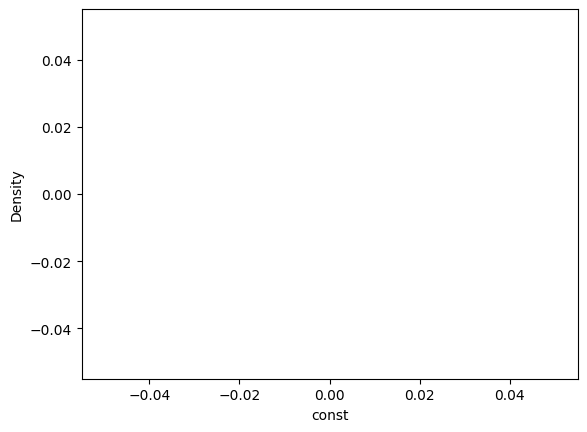

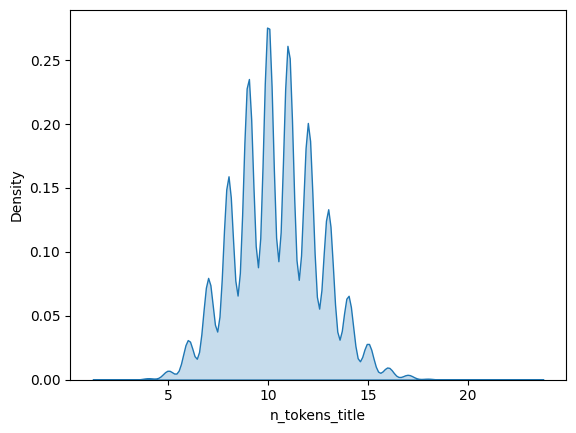

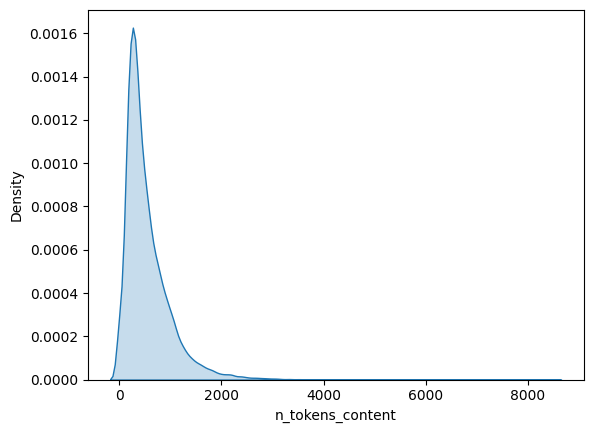

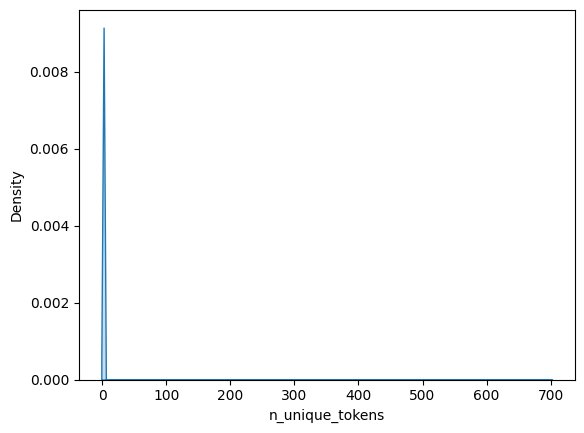

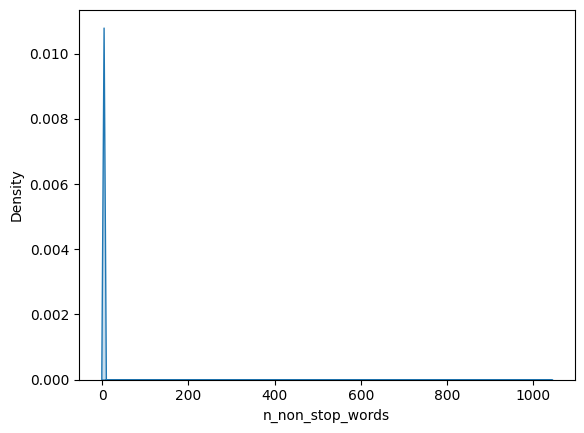

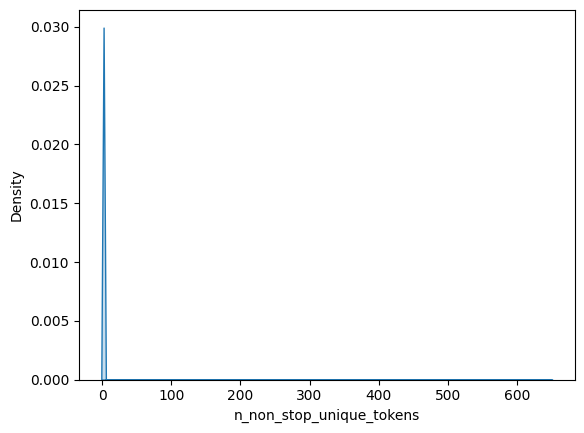

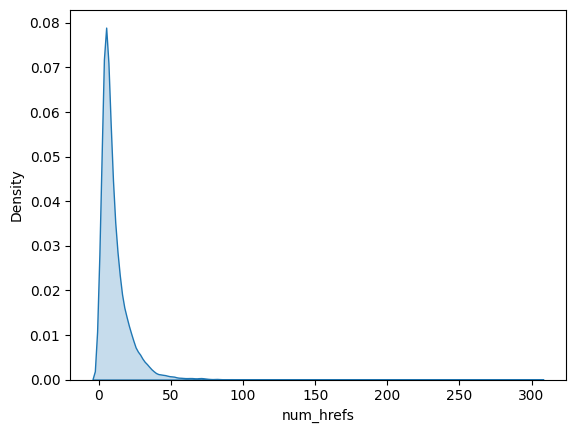

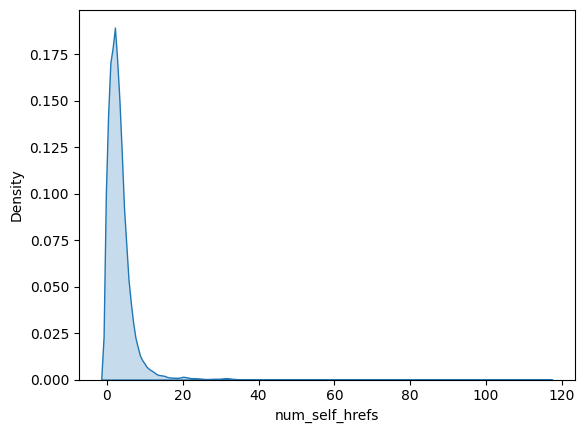

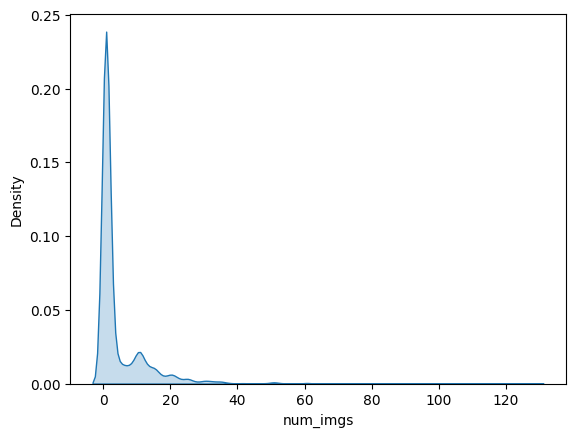

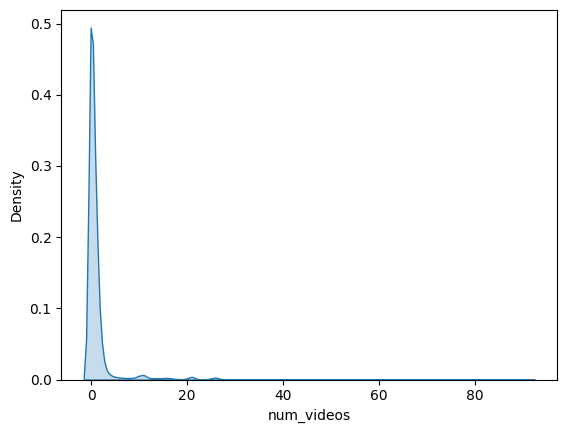

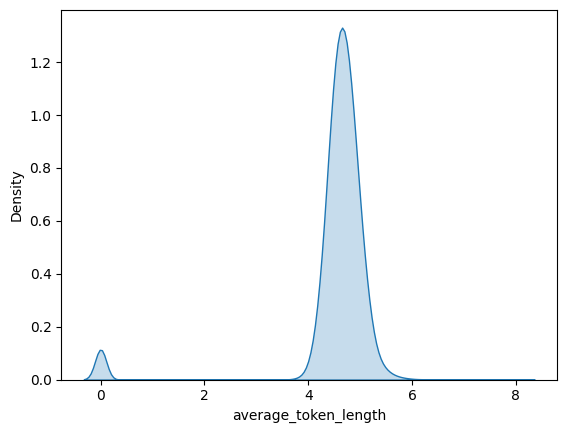

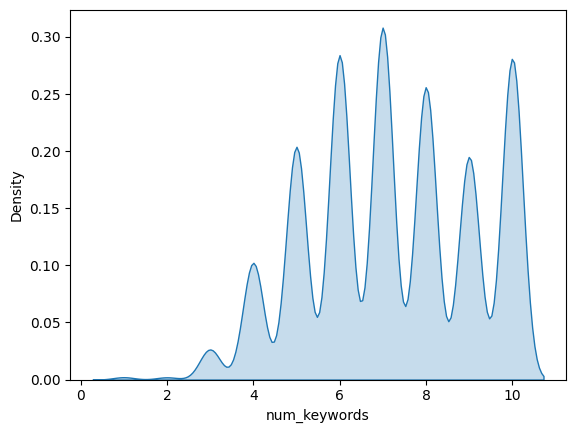

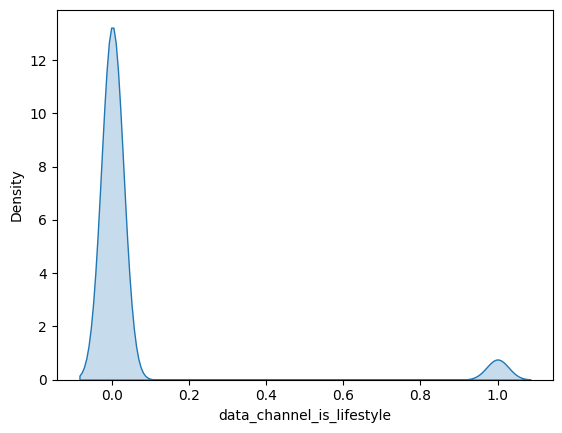

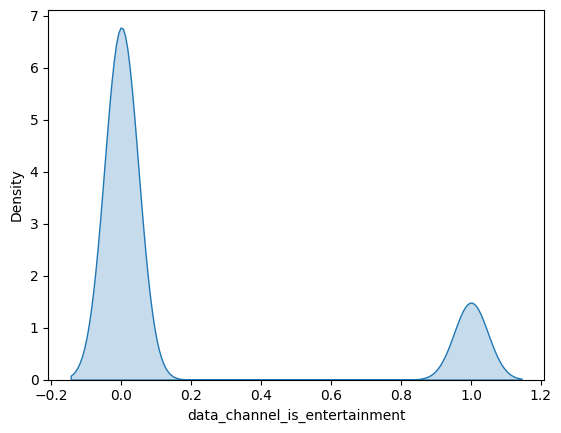

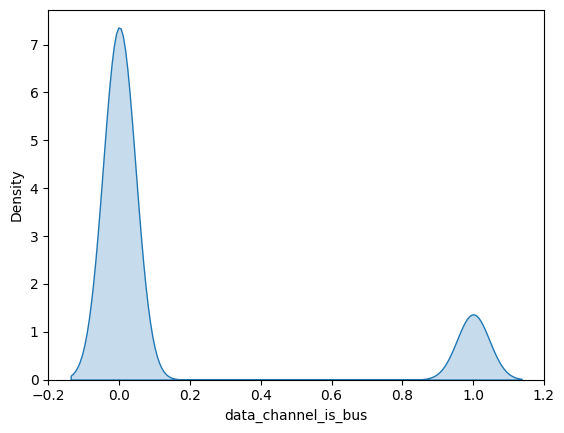

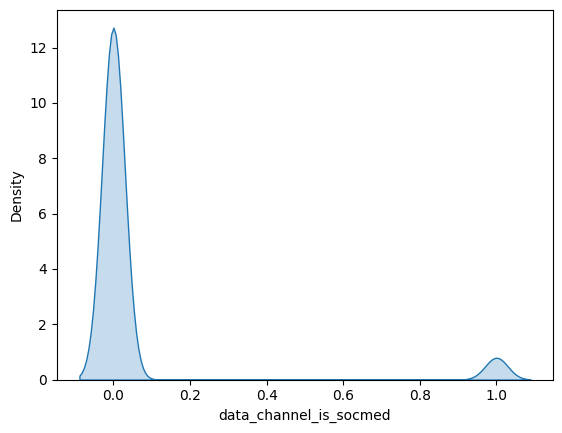

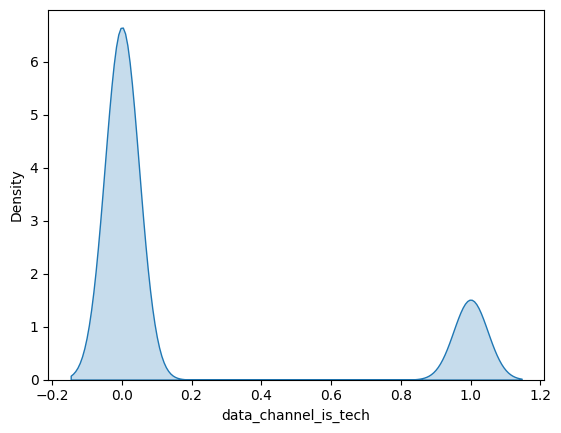

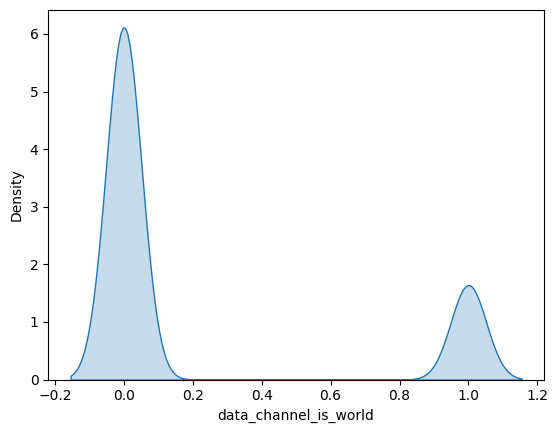

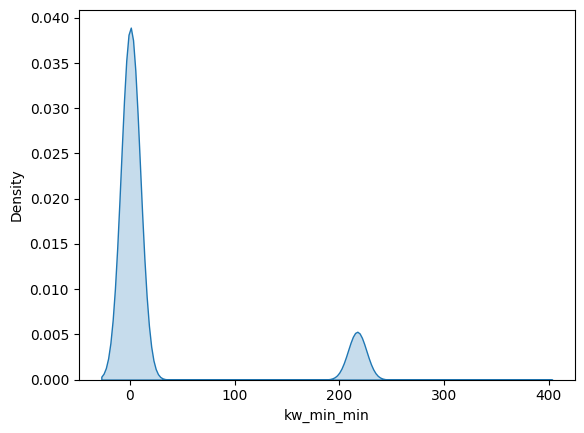

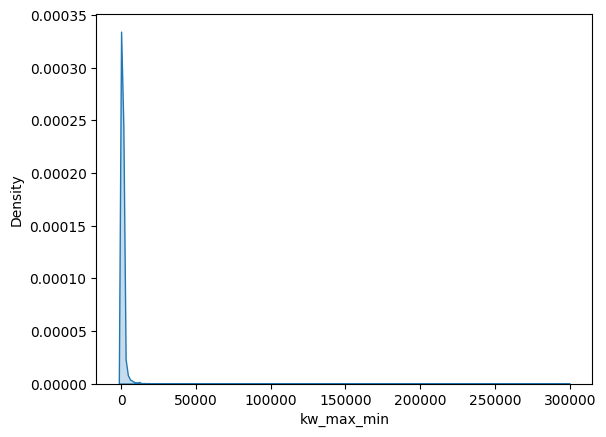

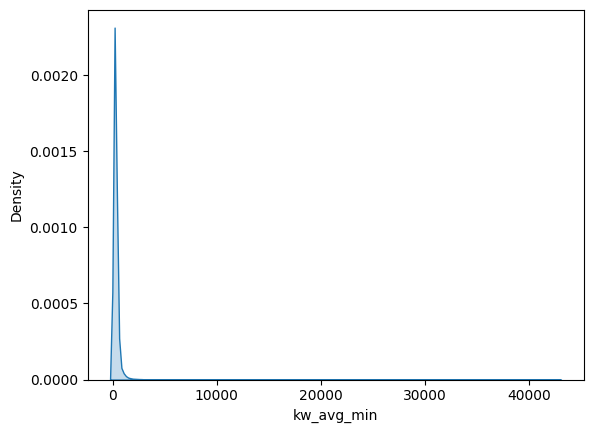

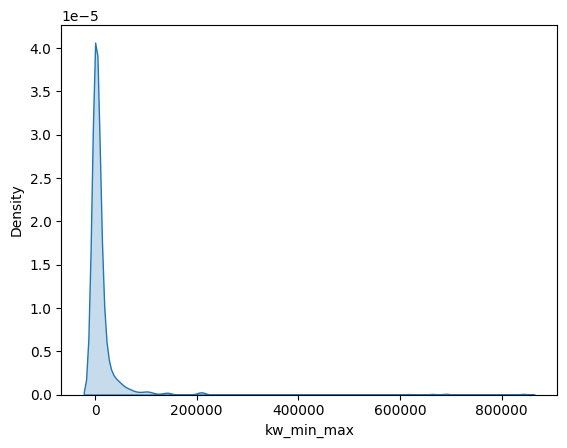

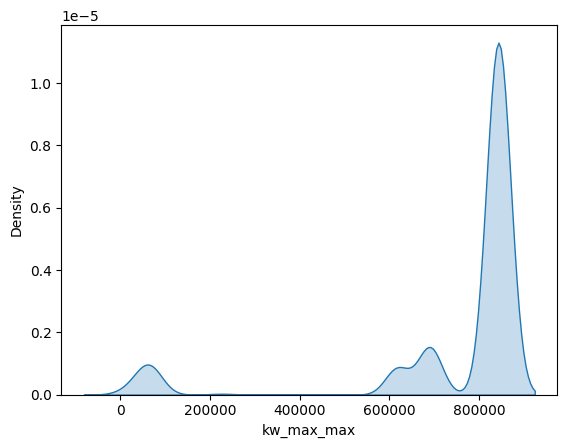

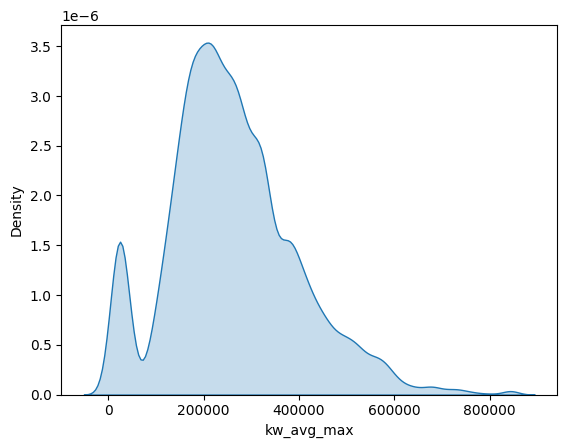

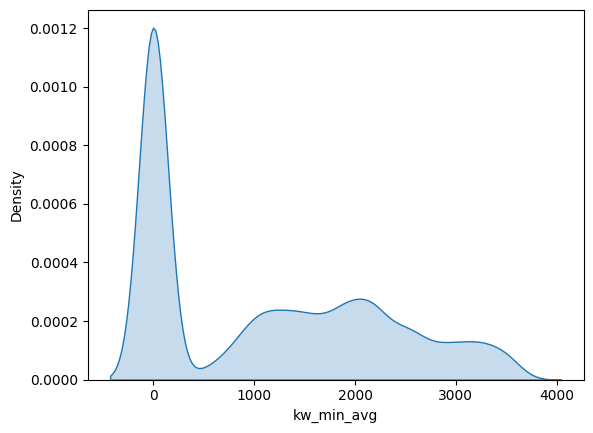

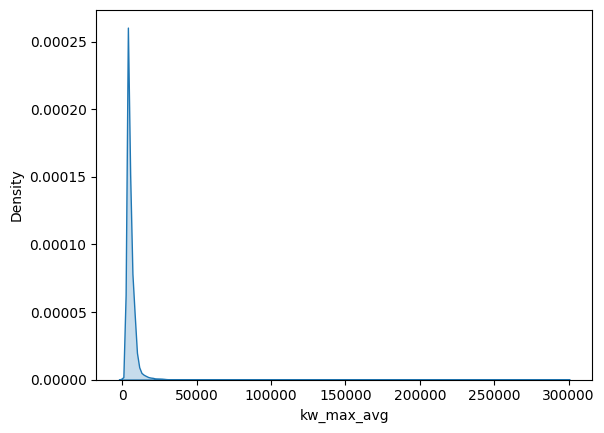

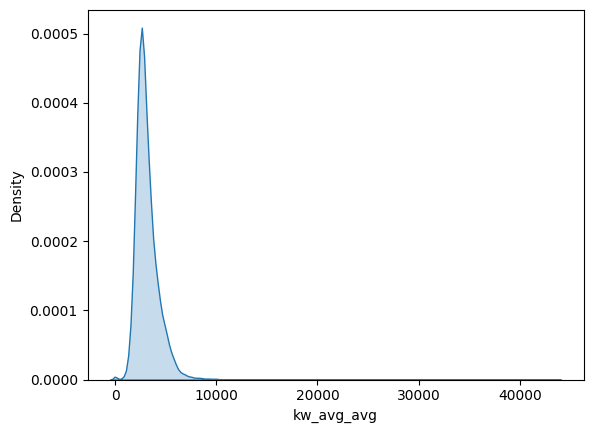

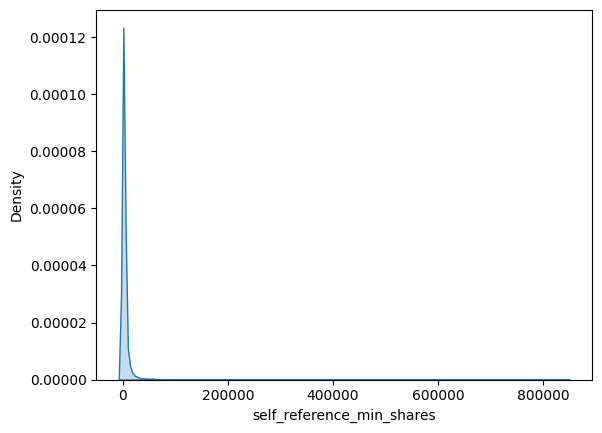

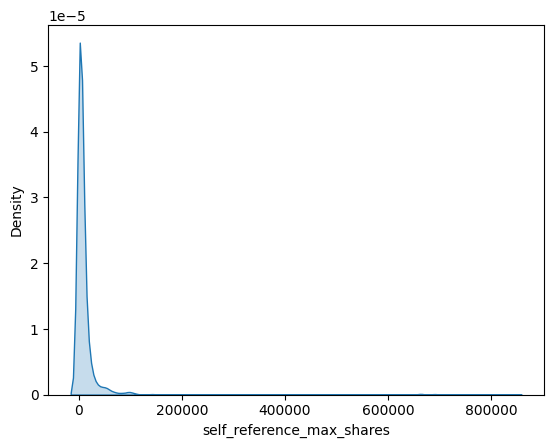

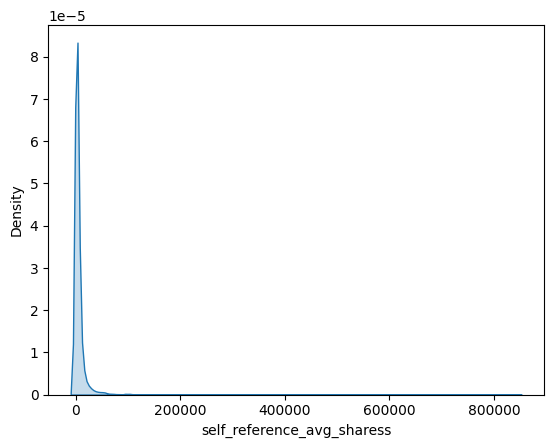

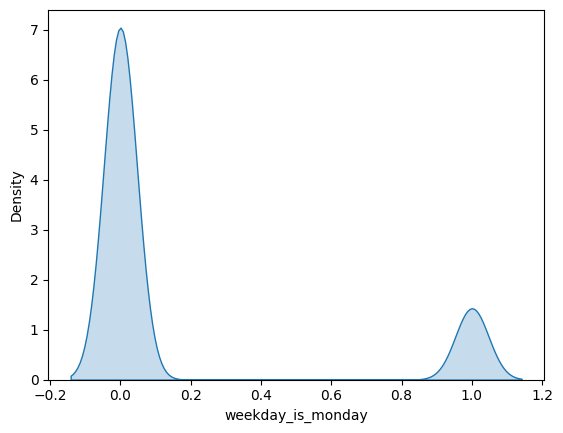

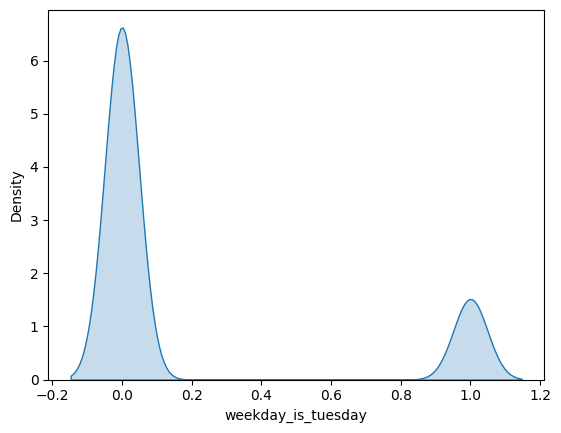

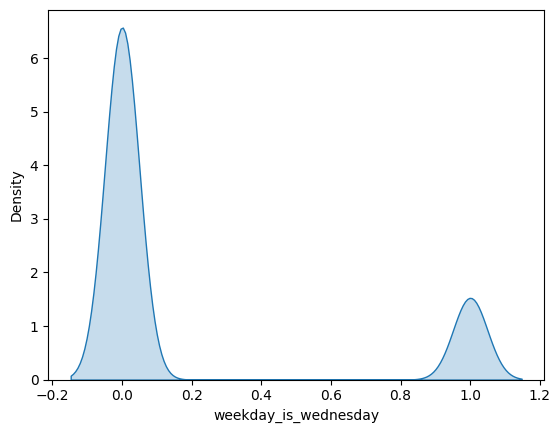

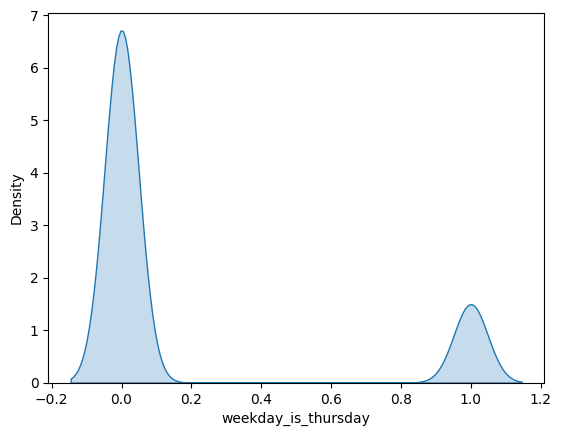

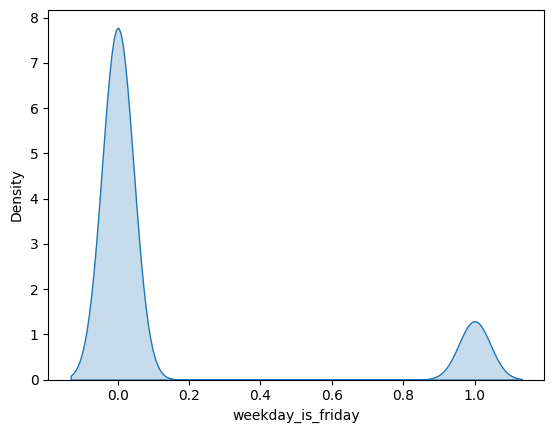

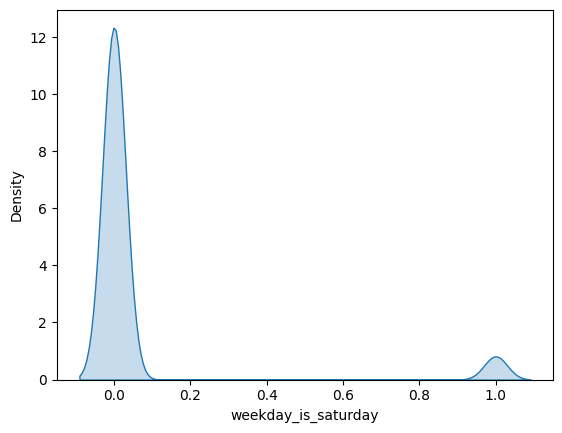

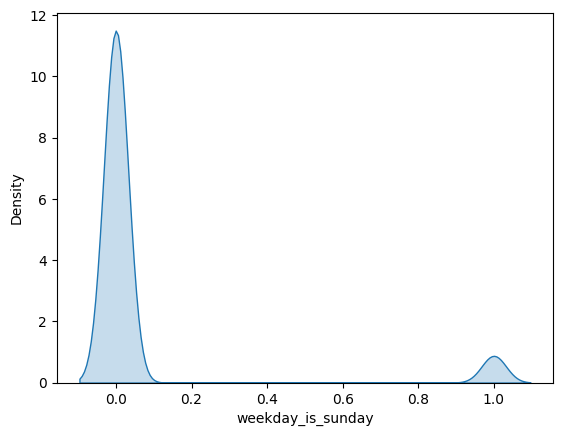

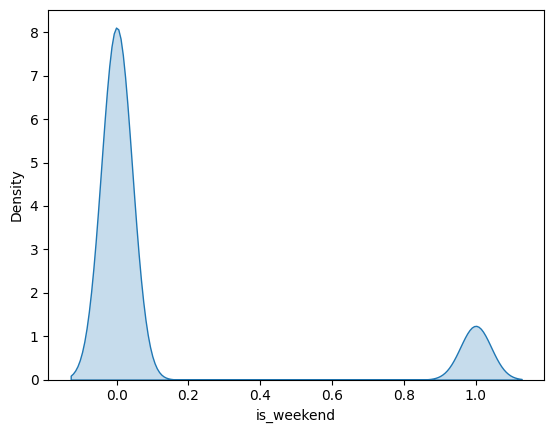

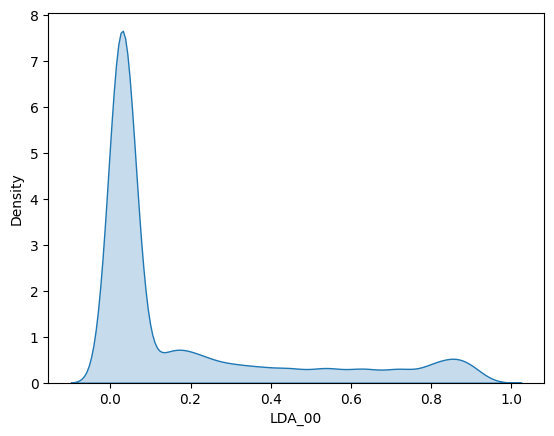

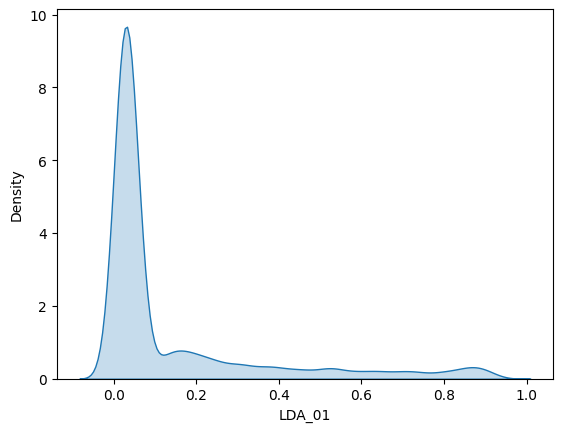

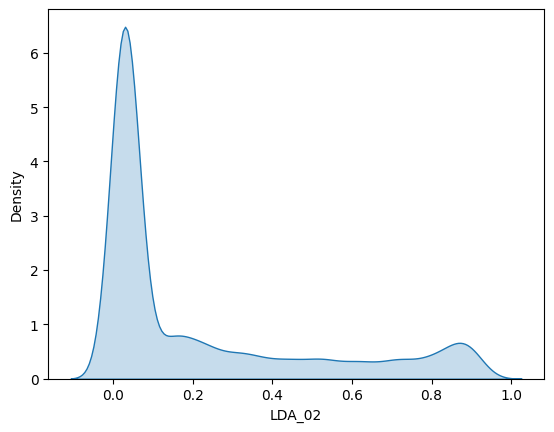

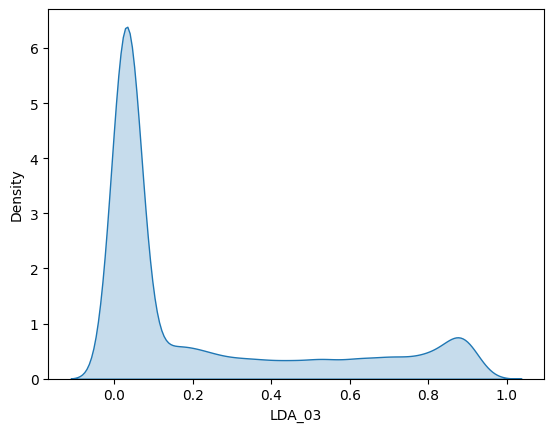

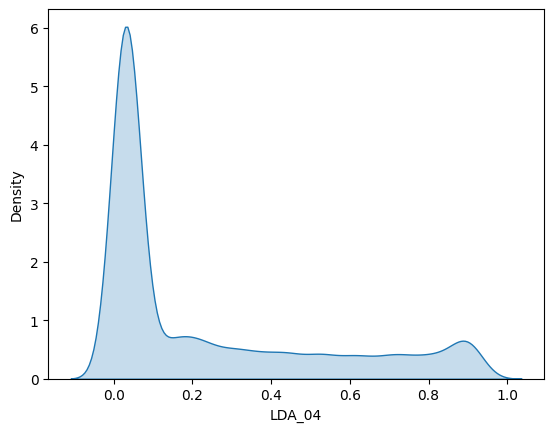

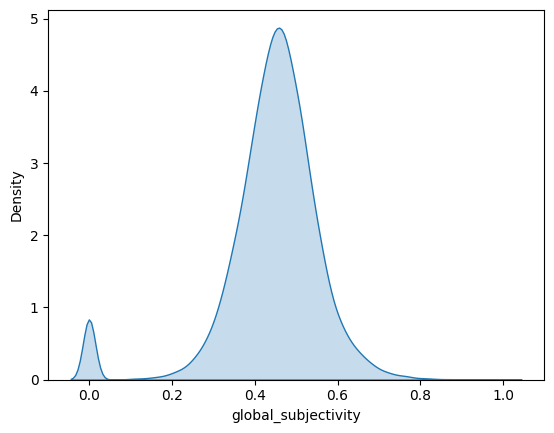

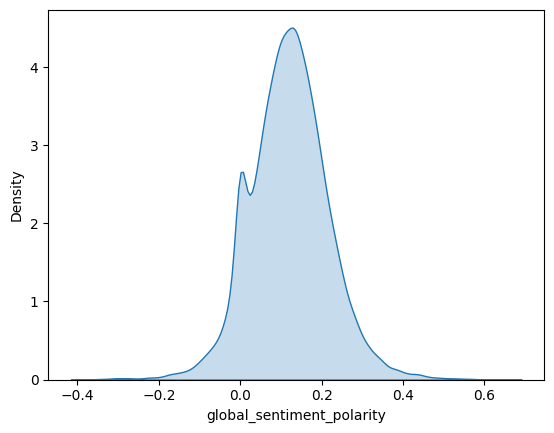

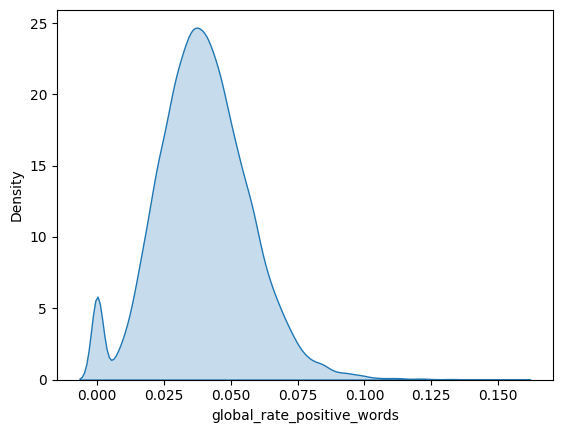

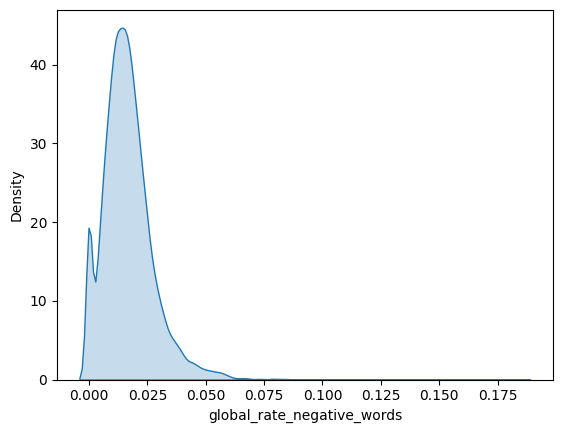

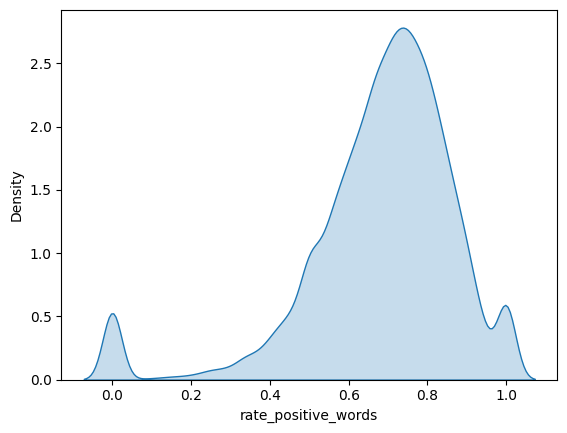

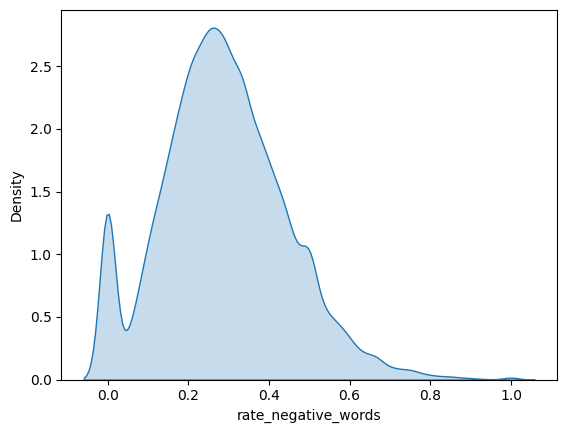

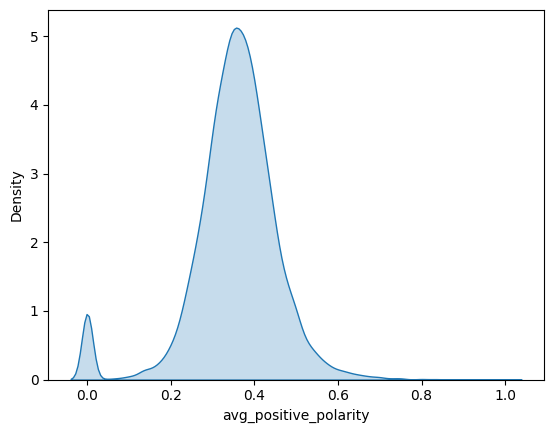

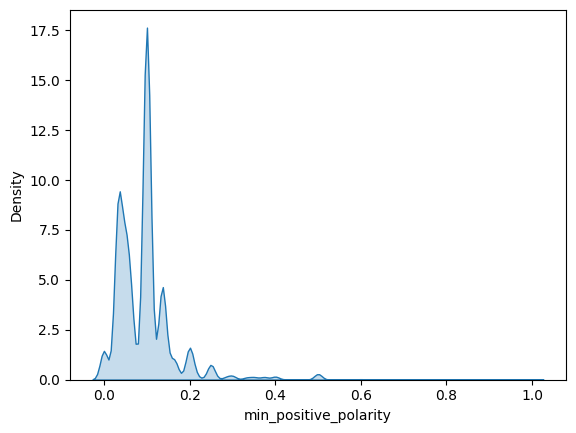

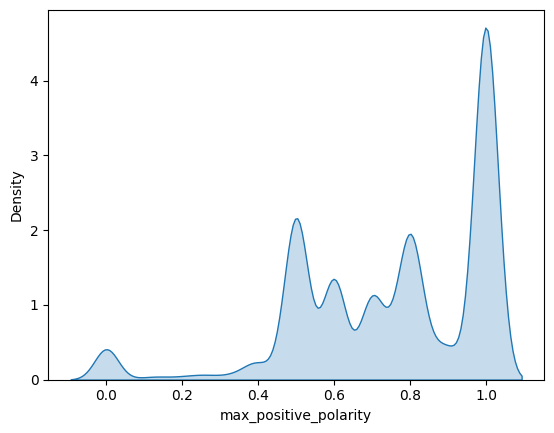

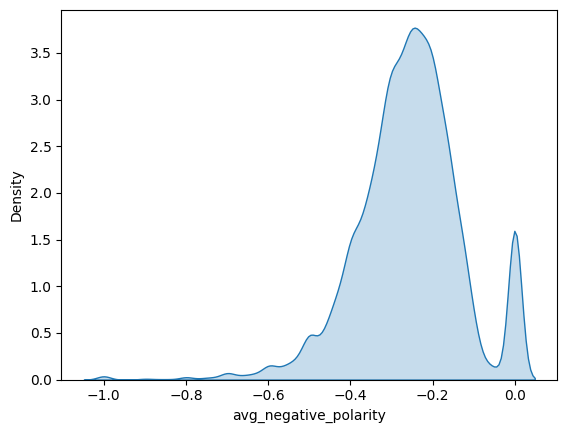

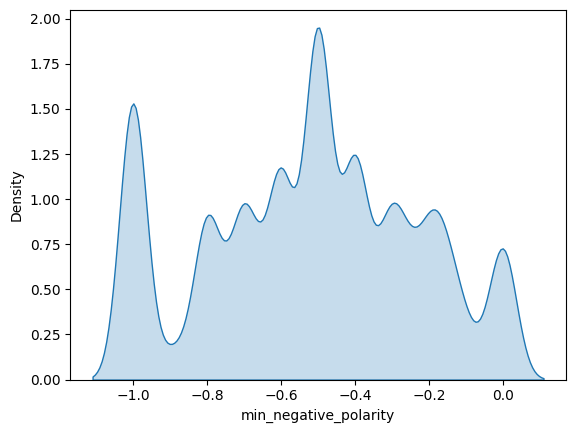

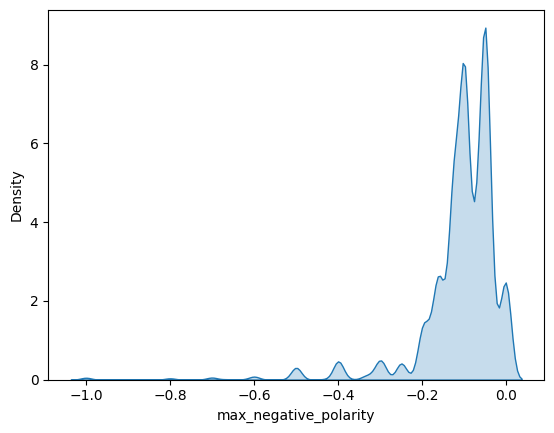

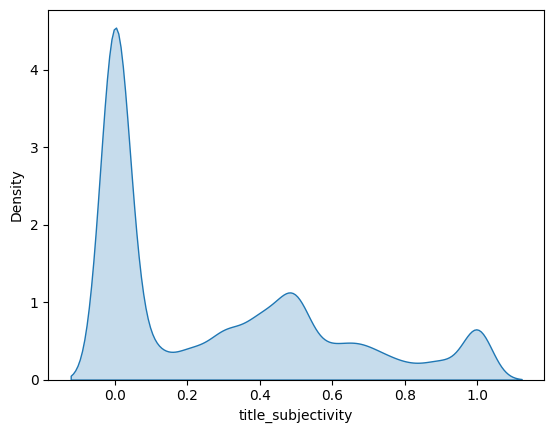

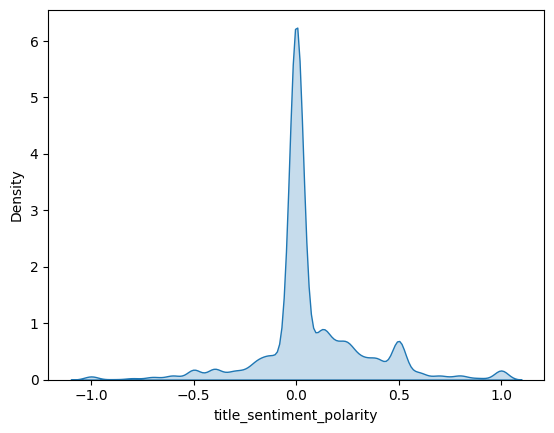

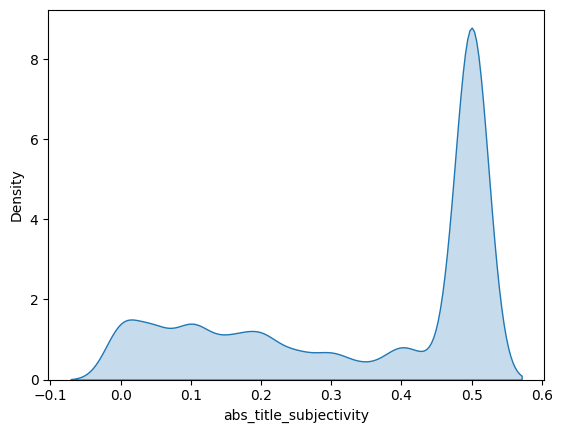

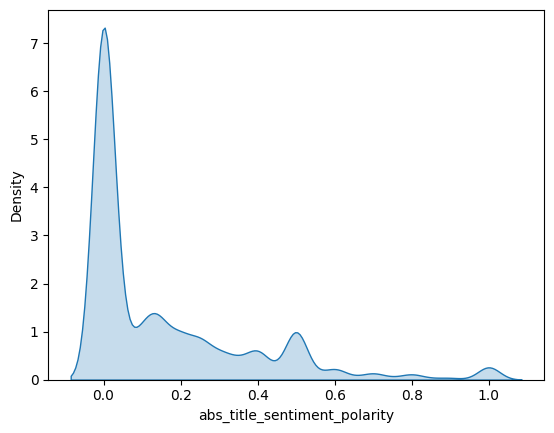

In [14]:
# Generate kd plot for each variable in lin_1_model
for col in X_train.columns:
  sns.kdeplot(data=X_train, x=col, fill=True)
  plt.show()

In [15]:
# Log transform each column that has three outliers above three standard deviations from mean
X_train_log_copy = X_train.copy()
X_test_log_copy = X_test.copy()
for col in X_train.columns:
  if X_train[col].nlargest(5).min() > 5 * X_train[col].std() + X_train[col].mean() and \
    X_train[col].min() >= 0:
    print(f"Now logging {col}")
    X_train_log_copy[col] = np.log(X_train[col] + 1e-10)
    X_test_log_copy[col] = np.log(X_test[col] + 1e-10)

# Now build revised model with logged dataframe
lin_2_model = sm.OLS(y_train, X_train_log_copy)
lin_2_results = lin_2_model.fit()
lin_2_train_log_dropped_copy = X_train_log_copy.copy()
lin_2_test_log_dropped_copy = X_test_log_copy.copy()
while lin_2_results.pvalues.drop("const").max() > 0.05:
  max_p_value_predictor = lin_2_results.pvalues.drop("const").idxmax()
  print(f"Dropping {max_p_value_predictor}")
  lin_2_train_log_dropped_copy = lin_2_train_log_dropped_copy.drop(max_p_value_predictor, axis=1)
  lin_2_test_log_dropped_copy = lin_2_test_log_dropped_copy.drop(max_p_value_predictor, axis=1)

  lin_2_model = sm.OLS(y_train, lin_2_train_log_dropped_copy)
  lin_2_results = lin_2_model.fit()
lin_2_results.summary()

Now logging n_tokens_content
Now logging num_hrefs
Now logging num_self_hrefs
Now logging num_imgs
Now logging num_videos
Now logging kw_max_min
Now logging kw_min_max
Now logging kw_max_avg
Now logging kw_avg_avg
Now logging self_reference_min_shares
Now logging self_reference_max_shares
Now logging self_reference_avg_sharess
Now logging global_rate_positive_words
Now logging global_rate_negative_words
Now logging avg_positive_polarity
Now logging min_positive_polarity
Dropping avg_negative_polarity
Dropping num_imgs
Dropping n_tokens_content
Dropping rate_negative_words
Dropping max_positive_polarity
Dropping num_self_hrefs
Dropping max_negative_polarity
Dropping n_non_stop_words
Dropping kw_avg_max
Dropping data_channel_is_tech
Dropping abs_title_sentiment_polarity
Dropping kw_avg_min
Dropping n_unique_tokens
Dropping n_tokens_title


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     98.63
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:07:07   Log-Likelihood:                -40857.
No. Observations:               31715   AIC:                         8.180e+04
Df Residuals:                   31672   BIC:                         8.216e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           188.6271     29.699      6.351      0.000     130.415     246.839
n_non_stop_unique_tokens         -0.3400      0.054     -6.326      0.000      -0.445      -0.235
num_hrefs                         0.0138      0.003      4.432      0.000       0.008       0.020
num_videos                        0.0044      0.000      9.432      0.000       0.004       0.005
average_token_length             -0.0398      0.018     -2.264      0.024      -0.074      -0.005
num_keywords                      0.0173      0.003      5.609      0.000       0.011       0.023
data_channel_is_lifestyle        -0.1253      0.024     -5.262      0.000      -0.172      -0.079
data_channel_is_entertainment    -0.3290      0.019    -17.727      0.000      -0.365      -0.293
data_channel_is_bus              -0.2709      0.026    -10.570      0.000      -0.321      -0.221
data_channel_is_socmed            0.0696      0.026      2.709      0.007       0.019       0.120
data_channel_is_world            -0.1946      0.024     -8.034      0.000      -0.242      -0.147
kw_min_min                        0.0009      0.000      6.173      0.000       0.001       0.001
kw_max_min                        0.0070      0.001      5.489      0.000       0.004       0.009
kw_min_max                       -0.0131      0.001    -18.839      0.000      -0.014      -0.012
kw_max_max                     1.762e-07   4.85e-08      3.636      0.000    8.12e-08    2.71e-07
kw_min_avg                        0.0002   9.95e-06     23.730      0.000       0.000       0.000
kw_max_avg                        0.1322      0.023      5.745      0.000       0.087       0.177
kw_avg_avg                       -0.1200      0.024     -5.007      0.000      -0.167      -0.073
self_reference_min_shares        -0.0785      0.011     -6.932      0.000      -0.101      -0.056
self_reference_max_shares        -0.2119      0.024     -8.656      0.000      -0.260      -0.164
self_reference_avg_sharess        0.2951      0.034      8.600      0.000       0.228       0.362
weekday_is_monday                33.2867      5.241      6.351      0.000      23.014      43.559
weekday_is_tuesday               33.2265      5.241      6.340      0.000      22.954      43.499
weekday_is_wednesday             33.2212      5.241      6.338      0.000      22.948      43.494
weekday_is_thursday              33.2398      5.241      6.342      0.000      22.967      43.512
weekday_is_friday                33.3033      5.241      6.354      0.000      23.030      43.577
weekday_is_saturday              11.1747      1.747      6.397      0.000       7.751      14.599
weekday_is_sunday                11.1749      1.747      6.397      0.000       7.751      14.599
is_weekend                       22.3496     

In [16]:
# Print out of sample R2 score for lin_2_model
print(f"Out of sample R2 score: {r2_score(y_test, lin_2_results.predict(lin_2_test_log_dropped_copy))}")

Out of sample R2 score: 0.11220308660985379


In [17]:
# Explore higher order terms for each predictor
X_train_log_order_copy = X_train_log_copy.copy()
X_test_log_order_copy = X_test_log_copy.copy()

for col in X_train_log_copy.columns:
  X_train_log_order_copy[f"{col}_squared"] = X_train_log_copy[col] ** 2
  X_train_log_order_copy[f"{col}_cubed"] = X_train_log_copy[col] ** 3
  X_test_log_order_copy[f"{col}_squared"] = X_test_log_copy[col] ** 2
  X_test_log_order_copy[f"{col}_cubed"] = X_test_log_copy[col] ** 3

lin_3_model = sm.OLS(y_train, X_train_log_order_copy)
lin_3_results = lin_3_model.fit()
lin_3_results.summary()

<ipython-input-17-b6b4b7ca1f44>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_log_order_copy[f"{col}_cubed"] = X_train_log_copy[col] ** 3
<ipython-input-17-b6b4b7ca1f44>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_log_order_copy[f"{col}_cubed"] = X_test_log_copy[col] ** 3
<ipython-input-17-b6b4b7ca1f44>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                      -0.312
Model:                            OLS   Adj. R-squared:                 -0.312
Method:                 Least Squares   F-statistic:                    -837.6
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               1.00
Time:                        01:07:08   Log-Likelihood:                -47112.
No. Observations:               31715   AIC:                         9.424e+04
Df Residuals:                   31705   BIC:                         9.433e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -8.793e-06   2.35e-07    -37.388      0.000   -9.25e-06   -8.33e-06
n_tokens_title                         1.115e-06   4.42e-07      2.519      0.012    2.47e-07    1.98e-06
n_tokens_content                       8.385e-07    1.2e-07      6.984      0.000    6.03e-07    1.07e-06
n_unique_tokens                        1.203e-08   3.24e-10     37.105      0.000    1.14e-08    1.27e-08
n_non_stop_words                       2.297e-08      5e-10     45.970      0.000     2.2e-08     2.4e-08
n_non_stop_unique_tokens               1.545e-08   3.83e-10     40.375      0.000    1.47e-08    1.62e-08
num_hrefs                              3.269e-08   1.67e-08      1.955      0.051   -8.58e-11    6.55e-08
num_self_hrefs                         4.537e-08   5.44e-09      8.344      0.000    3.47e-08     5.6e-08
num_imgs                              -9.937e-09      3e-09     -3.312      0.001   -1.58e-08   -4.06e-09
num_videos                            -1.345e-08   2.43e-09     -5.527      0.000   -1.82e-08   -8.68e-09
average_token_length                   1.023e-07    2.2e-09     46.542      0.000     9.8e-08    1.07e-07
num_keywords                           1.866e-07   7.06e-09     26.434      0.000    1.73e-07       2e-07
data_channel_is_lifestyle              1.083e-08   8.95e-09      1.210      0.226   -6.71e-09    2.84e-08
data_channel_is_entertainment          4.636e-08   5.52e-09      8.402      0.000    3.55e-08    5.72e-08
data_channel_is_bus                    9.491e-08   5.68e-09     16.723      0.000    8.38e-08    1.06e-07
data_channel_is_socmed                 1.537e-07   9.95e-09     15.453      0.000    1.34e-07    1.73e-07
data_channel_is_tech                   2.937e-07   1.69e-08     17.390      0.000    2.61e-07    3.27e-07
data_channel_is_world                  1.291e-08   1.09e-08      1.185      0.236   -8.45e-09    3.43e-08
kw_min_min                            -3.808e-07   5.97e-08     -6.381      0.000   -4.98e-07   -2.64e-07
kw_max_min                            -6.002e-08   1.28e-08     -4.698      0.000   -8.51e-08    -3.5e-08
kw_avg_min                             4.024e-06   1.56e-07     25.844      0.000    3.72e-06    4.33e-06
kw_min_max                            -1.304e-07   6.25e-09    -20.887      0.000   -1.43e-07   -1.18e-07
kw_max_max                             8.304e-05   9.28e-07     89.462      0.000    8.12e-05    8.49e-05
kw_avg_max                             3.459e-06   6.02e-07      5.743      0.000    2.28e-06    4.64e-06
kw_min_avg                             8.618e-06   2.31e-07     37.327      0.000    8.17e-06    9.07e-06
kw_max_avg                             -3.14e-07    1.3e-08    -24.186      0.000   -3.39e-07   -2.89e-07
kw_avg_av

In [18]:
# Print out of sample R2 score for lin_3_model
print(f"Out of sample R2 score: {r2_score(y_test, lin_3_results.predict(X_test_log_order_copy))}")

Out of sample R2 score: -0.36991685296173515


In [19]:
# Reduce model using step-wise reduction to remove insignificant variables
lin_4_step_model = sm.OLS(y_train, X_train_log_order_copy)
lin_4_step_results = lin_4_step_model.fit()
lin_4_train_copy = X_train_log_order_copy.copy()
lin_4_test_copy = X_test_log_order_copy.copy()
while lin_4_step_results.pvalues.drop("const").max() > 0.05:
  max_p_value_predictor = lin_4_step_results.pvalues.drop("const").idxmax()
  print(f"Dropping {max_p_value_predictor}")
  lin_4_train_copy = lin_4_train_copy.drop(max_p_value_predictor, axis=1)
  lin_4_test_copy = lin_4_test_copy.drop(max_p_value_predictor, axis=1)

  lin_4_step_model = sm.OLS(y_train, lin_4_train_copy)
  lin_4_step_results = lin_4_step_model.fit()
lin_4_step_results.summary()

Dropping num_self_hrefs_squared
Dropping kw_min_min
Dropping num_self_hrefs_cubed
Dropping num_hrefs_cubed
Dropping global_rate_negative_words_squared
Dropping data_channel_is_entertainment
Dropping data_channel_is_world
Dropping num_imgs
Dropping n_tokens_content_cubed
Dropping self_reference_min_shares_cubed
Dropping kw_min_min_squared
Dropping global_rate_negative_words_cubed
Dropping weekday_is_tuesday
Dropping weekday_is_thursday
Dropping data_channel_is_socmed
Dropping n_non_stop_words_cubed
Dropping n_unique_tokens_cubed
Dropping n_non_stop_unique_tokens_cubed
Dropping weekday_is_tuesday_squared
Dropping kw_avg_min
Dropping weekday_is_tuesday_cubed
Dropping n_unique_tokens_squared
Dropping num_keywords
Dropping n_non_stop_words_squared
Dropping LDA_02_squared
Dropping n_non_stop_unique_tokens_squared
Dropping LDA_02_cubed
Dropping self_reference_avg_sharess_cubed
Dropping max_negative_polarity_cubed
Dropping weekday_is_thursday_squared
Dropping data_channel_is_lifestyle
Dropping

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                      -0.313
Model:                            OLS   Adj. R-squared:                 -0.313
Method:                 Least Squares   F-statistic:                    -1079.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               1.00
Time:                        01:07:47   Log-Likelihood:                -47122.
No. Observations:               31715   AIC:                         9.426e+04
Df Residuals:                   31707   BIC:                         9.433e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  7.236e-07   1.79e-08     40.382      0.000    6.88e-07    7.59e-07
n_tokens_title                        -7.258e-06   2.99e-07    -24.251      0.000   -7.84e-06   -6.67e-06
n_tokens_content                       2.417e-06   8.21e-08     29.431      0.000    2.26e-06    2.58e-06
n_unique_tokens                        7.358e-09   3.56e-10     20.661      0.000    6.66e-09    8.06e-09
n_non_stop_words                         1.4e-08   5.32e-10     26.306      0.000     1.3e-08     1.5e-08
n_non_stop_unique_tokens               9.453e-09    3.6e-10     26.259      0.000    8.75e-09    1.02e-08
num_hrefs                               1.15e-08   2.07e-09      5.549      0.000    7.44e-09    1.56e-08
num_self_hrefs                         6.366e-08   2.75e-09     23.176      0.000    5.83e-08     6.9e-08
num_videos                             -1.49e-08   2.11e-09     -7.059      0.000    -1.9e-08   -1.08e-08
average_token_length                   5.252e-08   1.69e-09     31.044      0.000    4.92e-08    5.58e-08
data_channel_is_tech                   4.612e-09   1.16e-10     39.688      0.000    4.38e-09    4.84e-09
kw_max_min                             1.728e-07   9.42e-09     18.342      0.000    1.54e-07    1.91e-07
kw_min_max                            -1.304e-07   5.42e-09    -24.074      0.000   -1.41e-07    -1.2e-07
kw_max_max                             8.301e-05   9.16e-07     90.656      0.000    8.12e-05    8.48e-05
kw_avg_max                             3.757e-06   6.03e-07      6.232      0.000    2.58e-06    4.94e-06
kw_min_avg                             3.784e-06   2.25e-07     16.798      0.000    3.34e-06    4.23e-06
kw_max_avg                            -3.829e-07   1.31e-08    -29.133      0.000   -4.09e-07   -3.57e-07
kw_avg_avg                            -3.587e-07   1.15e-08    -31.328      0.000   -3.81e-07   -3.36e-07
self_reference_min_shares               1.22e-07   5.87e-09     20.787      0.000     1.1e-07    1.33e-07
self_reference_max_shares              1.145e-07    4.2e-09     27.271      0.000    1.06e-07    1.23e-07
self_reference_avg_sharess             1.015e-07   3.94e-09     25.752      0.000    9.38e-08    1.09e-07
weekday_is_monday                      1.644e-08   4.89e-10     33.606      0.000    1.55e-08    1.74e-08
weekday_is_wednesday                   5.241e-10   8.56e-11      6.125      0.000    3.56e-10    6.92e-10
weekday_is_friday                     -6.962e-10   2.88e-11    -24.193      0.000   -7.53e-10    -6.4e-10
weekday_is_saturday                   -1.102e-09   4.23e-11    -26.033      0.000   -1.18e-09   -1.02e-09
weekday_is_sunday                     -6.695e-10   3.97e-11    -16.884      0.000   -7.47e-10   -5.92e-10
is_weeken

In [20]:
# Print out of sample R2 score for lin_4_step_model
print(f"Out of sample R2 score: {r2_score(y_test, lin_4_step_results.predict(lin_4_test_copy))}")

Out of sample R2 score: -0.3708898965662202


In [21]:
# Explore different alpha values for Lasso models on the dataset to find the best alpha value
# Standardize values
lin_4_scaler = StandardScaler()
lin_4_scaler.fit(X_train_log_order_copy)
lin_4_alpha_train_copy = X_train_log_order_copy.copy()
lin_4_alpha_test_copy = X_test_log_order_copy.copy()

alphas = [i / 100 for i in range(0,100,5)]
lasso_results = []
for alpha in alphas:
  print(f"Fitting Lasso with alpha={alpha}")
  lasso = Lasso(alpha=alpha)
  lasso.fit(lin_4_scaler.transform(lin_4_alpha_train_copy), y_train)
  lasso_results.append([alpha, r2_score(y_train, lasso.predict(lin_4_scaler.transform(lin_4_alpha_train_copy))), r2_score(y_test, lasso.predict(lin_4_scaler.transform(lin_4_alpha_test_copy)))])
lasso_results = pd.DataFrame(lasso_results, columns=["alpha", "r2_score_train", "r2_score_test"])
lasso_results

Fitting Lasso with alpha=0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+04, tolerance: 2.761e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Fitting Lasso with alpha=0.05
Fitting Lasso with alpha=0.1
Fitting Lasso with alpha=0.15
Fitting Lasso with alpha=0.2
Fitting Lasso with alpha=0.25
Fitting Lasso with alpha=0.3
Fitting Lasso with alpha=0.35
Fitting Lasso with alpha=0.4
Fitting Lasso with alpha=0.45
Fitting Lasso with alpha=0.5
Fitting Lasso with alpha=0.55
Fitting Lasso with alpha=0.6
Fitting Lasso with alpha=0.65
Fitting Lasso with alpha=0.7
Fitting Lasso with alpha=0.75
Fitting Lasso with alpha=0.8
Fitting Lasso with alpha=0.85
Fitting Lasso with alpha=0.9
Fitting Lasso with alpha=0.95


,alpha,r2_score_train,r2_score_test
0,0.00,0.157985,0.151672
1,0.05,0.068440,0.064820
2,0.10,0.026612,0.025256
3,0.15,0.001414,0.001248
4,0.20,0.000000,-0.000187
5,0.25,0.000000,-0.000187
6,0.30,0.000000,-0.000187
7,0.35,0.000000,-0.000187
8,0.40,0.000000,-0.000187
9,0.45,0.000000,-0.000187


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [22]:
# Build and train a regression tree model. Use cost complexity pruning and cross validation to find model that fits well on out-of-distribution data
tree_1_X_train_copy = X_train_log_order_copy.copy()
tree_1_X_test_copy = X_test_log_order_copy.copy()

tree_1_reg_model = DecisionTreeRegressor(max_depth = 4)
mod_tree = tree_1_reg_model.fit(tree_1_X_train_copy, y_train)

# This code gives a bunch of possible alphas that can be used
path = mod_tree.cost_complexity_pruning_path(tree_1_X_train_copy,y_train)

# Create empty vectors to collect in sample and out of sample R^2 values
results = []

# Do a loop testing different alphas and calculating in sample and out of sample R^2 values
for ccp_alpha in tqdm(path.ccp_alphas):
    tree_temp = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    tree_temp.fit(tree_1_X_train_copy, y_train)
    results.append((ccp_alpha, r2_score(y_train,tree_temp.predict(tree_1_X_train_copy)), r2_score(y_test,tree_temp.predict(tree_1_X_test_copy))))

pd.DataFrame(data=results, columns=["alpha", "r2_score_train", "r2_score_test"])

100%|██████████| 16/16 [04:51<00:00, 18.22s/it]


,alpha,r2_score_train,r2_score_test
0,0.000000,1.000000,-0.823575
1,0.000750,0.137887,0.085666
2,0.001273,0.115865,0.084478
3,0.001287,0.114386,0.083268
4,0.001621,0.103981,0.091466
5,0.001684,0.100185,0.087093
6,0.001877,0.098029,0.085225
7,0.002006,0.095725,0.083136
8,0.002445,0.095725,0.083136
9,0.003175,0.089270,0.080128


In [23]:
# Fit Random Forest model and experiment with different alpha values, performing cost complexity pruning
tree_2_X_train_copy = X_train_log_order_copy.copy().iloc[:5000]
tree_2_X_test_copy = X_test_log_order_copy.copy().iloc[:5000]

# Create empty vectors to collect in sample and out of sample R^2 values
results = []

# Do a loop testing different alphas and calculating in sample and out of sample R^2 values
for ccp_alpha in tqdm([i/100 for i in range(0, 50, 5)]):
    tree_temp = RandomForestRegressor(n_estimators=25, random_state=0,ccp_alpha = ccp_alpha)
    tree_temp.fit(tree_2_X_train_copy, y_train.iloc[:5000])
    results.append((ccp_alpha, r2_score(y_train.iloc[:5000],tree_temp.predict(tree_2_X_train_copy)), r2_score(y_test.iloc[:5000],tree_temp.predict(tree_2_X_test_copy))))

pd.DataFrame(data=results, columns=["alpha", "r2_score_train", "r2_score_test"])

100%|██████████| 10/10 [03:30<00:00, 21.04s/it]


,alpha,r2_score_train,r2_score_test
0,0.00,8.607059e-01,0.089014
1,0.05,4.651930e-02,0.041835
2,0.10,-7.804750e-07,-0.001439
3,0.15,-7.804750e-07,-0.001439
4,0.20,-7.804750e-07,-0.001439
5,0.25,-7.804750e-07,-0.001439
6,0.30,-7.804750e-07,-0.001439
7,0.35,-7.804750e-07,-0.001439
8,0.40,-7.804750e-07,-0.001439
9,0.45,-7.804750e-07,-0.001439


# Technical Report

## EDA

During our process of EDA, we determined that it would be beneficial to log the target variable of "shares" as it was significantly right skewed. The original un-transformed target variables looked like the following:

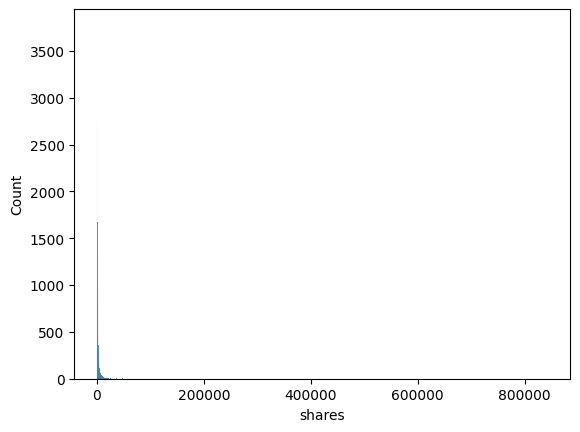

After the log transformation, we ended up with a target variable with the distribution shown below:

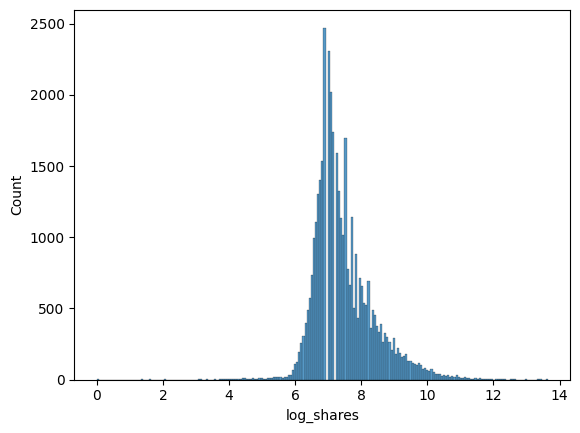

Training a linear regression model with all of the original predictors (except for "url" and "timedelta", which the dataset labeled as non-predictor variables) and the logged target variable "shares" resulted in a in-distribution R^2 score of 0.127.

To find predictors of significance, we trained a linear regression model iteratively, removing predictors one at a time with the highest p-value until all p-values were below 0.05. In this manner, we found that the variables "self_reference_max_shares", "avg_positive_polarity", "weekday_is_saturday", "is_weekend", "LDA_02", "weekday_is_sunday", "min_negative_polarity", "global_rate_negative_words", "n_non_stop_words", "max_positive_polarity", "kw_max_max", "abs_title_sentiment_polarity", "max_negative_polarity", "data_channel_is_world", "num_videos", "self_reference_min_shares", and "global_sentiment_polarity" were insignificant. The remaining predictors resulted in a linear regression model that achieved a in-distribution R^2 score of 0.126.

Furthermore, we checked this assumption by training a Regression Tree model and graphed its feature importances, which resulted in confirming the work done with the linear regression model. A graph of the feature importances is shown below:

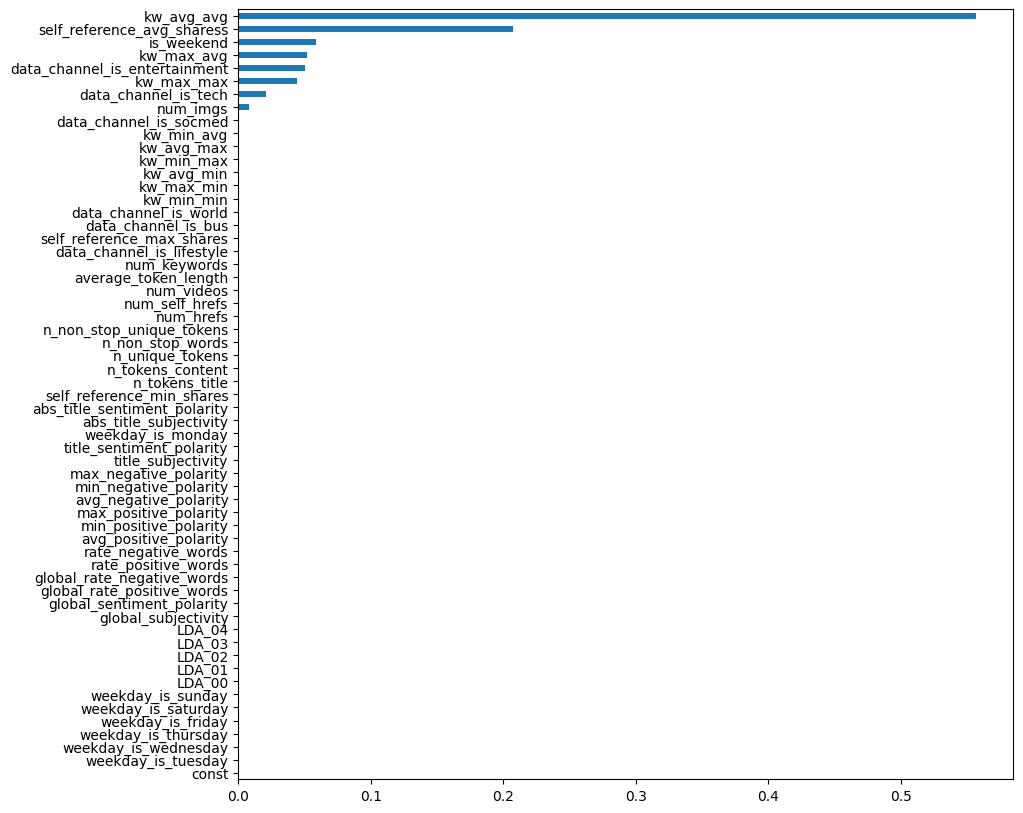

For visualizations of all the remaining significant variables, see the graphs at the beginning of the notebook.

## Linear Regression Model

Our first linear regression model was similar to that trained in the EDA section, which was trained on all of the predictors and the log-transformed target variable "shares". This model achieved an R^2 score of 0.126 in-distribution and an R^2 score of 0.127 on the out-of-distribution data, implying that there was little to no overfitting.

For our second linear regression model, we log transformed various predictors that were right-skewed and then dropped predictors one at a time until all predictors that remained has a p-value of less than 0.05. This resulted in an in-distrubtion R^2 score of 0.116 and an out-of-distribution R^2 score of 0.112. This could imply slight overfitting with this model.

Our third linear regression model was trained on all the predictors once again, some log-transformed, and additional squared and cubed higher-order predictors. This resulted in poor performance, leading to a -0.312 R^2 score in-distribution and a -0.369 R^2 score out-of-distrubtion. Dropping the insignificant predictors with a p-value threshold of 0.05 resulted in a -0.313 in-distribution R^2 score and a -0.370 out-of-distribution R^2 score.

We further explored using a LASSO Regression model with alpha values ranging from 0 to 0.95 with a step of 0.05. As shown in the results below, the best LASSO model was with an alpha value of 0, which only had a difference of 0.006 between the in-distribution and the out-of-distribution R^2 scores, leading us to believe there isn't a strong presence of overfitting.

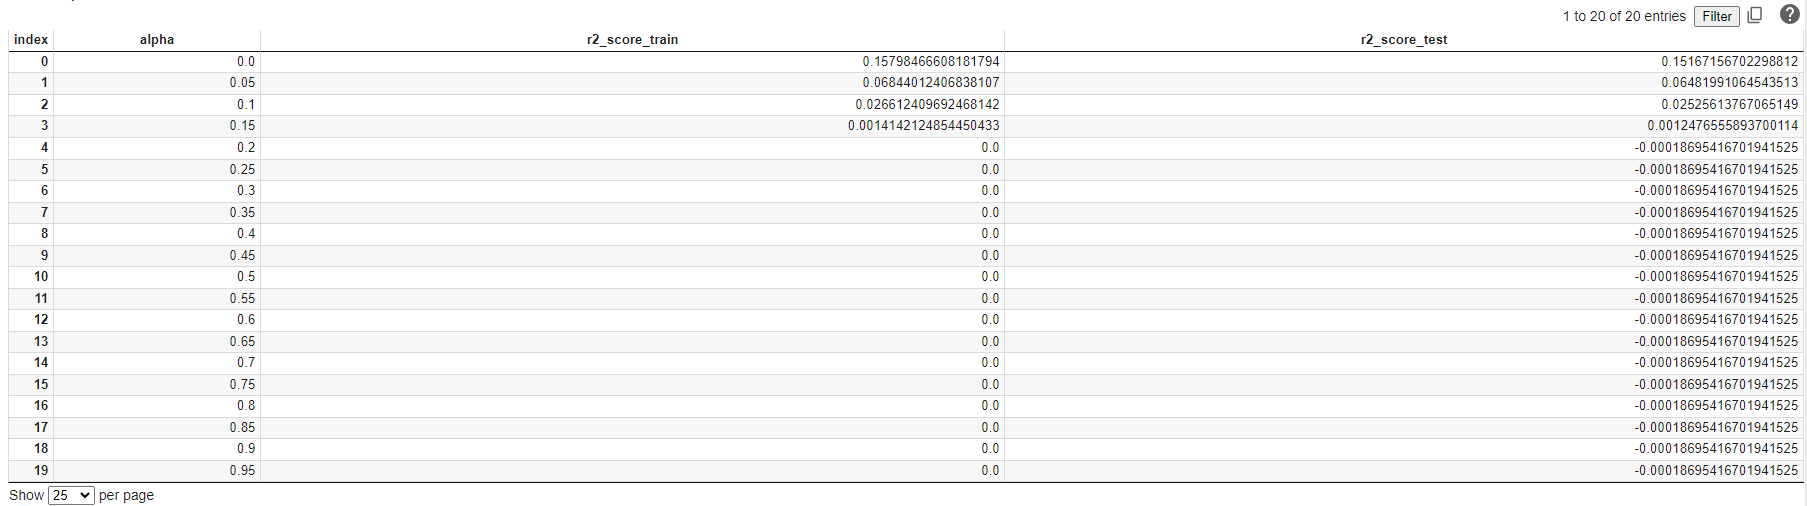

Our R^2 score on the test set determines that the most effective model for determining future share counts would be the LASSO model with an alpha value of 0. Note, however, that the R^2 value never crosses 0.16 for any models on any datasets, leading us to caution making any financial decisions of import.

## Regression Tree Modeling

Two different Regression Tree models were trained.

The first model was a standard Regression Tree model trained on the full data, including higher-order terms and logged right-skewed predictors. We experimented with different alpha values for cost-complexity pruning, resulting in the data shown in the table below. From these results, we conclude that an alpha value of 0.0016 achieves the highest R^2 values on the datasets while having little to no overfitting.

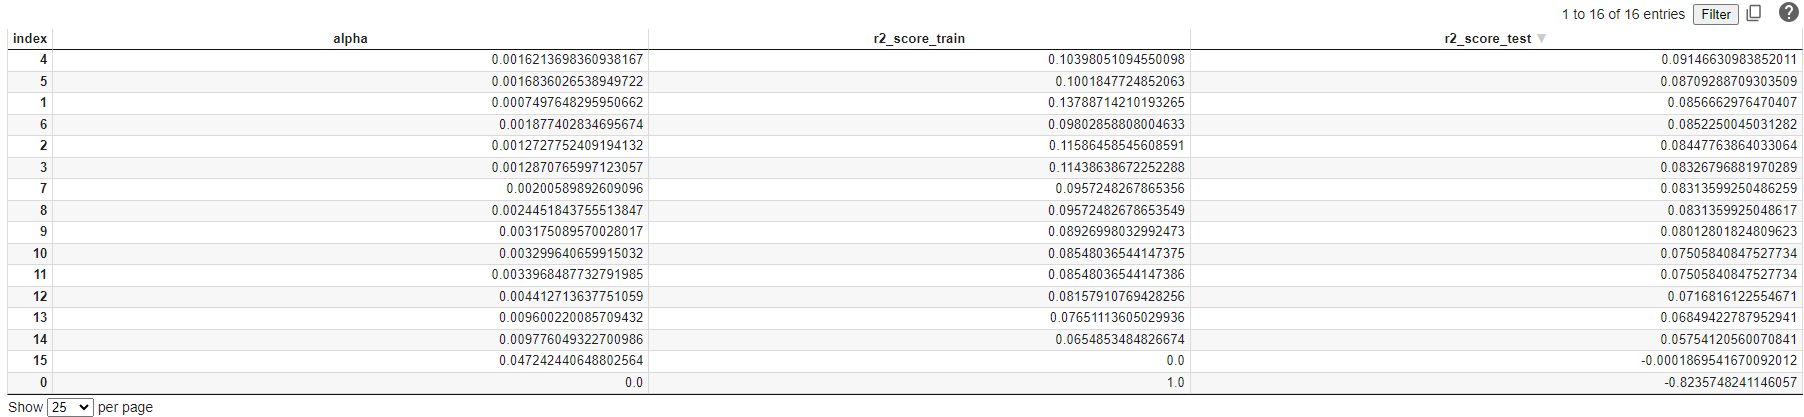

Our Random Forest models used 25 trees in the forest and were only trained and tested on the first 5000 rows of each dataset. We varied the alpha values from 0 to 0.45 with a step of 0.05 to explore cost-complexity pruning. As shown in the results table below, technically the model that achieved the highest out-of-distribution R^2 score was with an alpha value of 0.0, but the in-distribution R^2 score is an order of magnitude higher (0.089 vs 0.86), showing the model is greatly overfit. From the set of Random Forest models, we recommend the model with the alpha value of 0.05 instead, which although achieves lower R^2 scores on the datasets only has a difference of 0.005 between the scores.

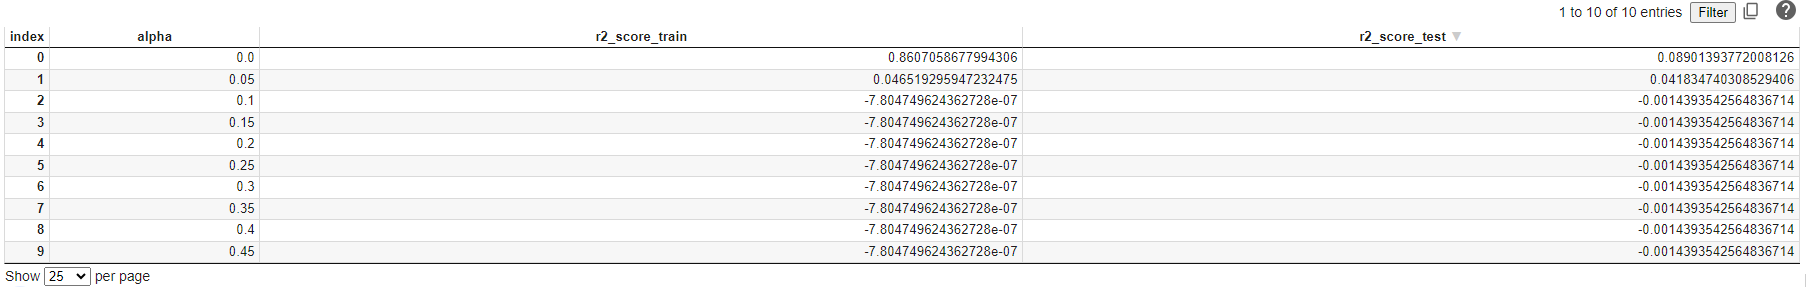

Since both of the best models in this section achieve lower than 0.1 R^2 scores on the out-of-distribution datasets, we caution executives from using these models to make decisions.

## Conclusion

Based upon the predictors provided, we don't encourage Mashable to make business decisions based upon these models. The best model that we trained and would recommend with the most confidence would be the LASSO model with an alpha value of 0.0. This model achieved less than 0.16 R^2 scores on both datasets, however, implying that there is still a lot of uncertainty and information not covered in the given predictors and are therefore not taken into account in the model's predictions.

We encourage Mashable to explore other indicators or predictor variables that will predict shares of their news articles.